## Config + imports

In [1]:
import os
import tensorflow as tf

# Evita la asignación completa de memoria GPU al inicio
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"

# Listar dispositivos GPU disponibles
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    try:
        # Establecer crecimiento dinámico de la memoria GPU
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"{len(gpus)} GPU(s) configurada(s) correctamente con crecimiento dinámico.")
    except RuntimeError as e:
        print(f"Error al configurar la GPU: {e}")
else:
    print("No se detectó ninguna GPU disponible.")

# Activar compilación JIT (XLA) para optimización adicional
tf.config.optimizer.set_jit(True)


2025-03-23 10:43:57.714881: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-23 10:43:57.725266: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742723037.736786    1130 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742723037.740130    1130 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-23 10:43:57.751128: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File

AttributeError: _ARRAY_API not found

1 GPU(s) configurada(s) correctamente con crecimiento dinámico.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Enunciado de la tarea

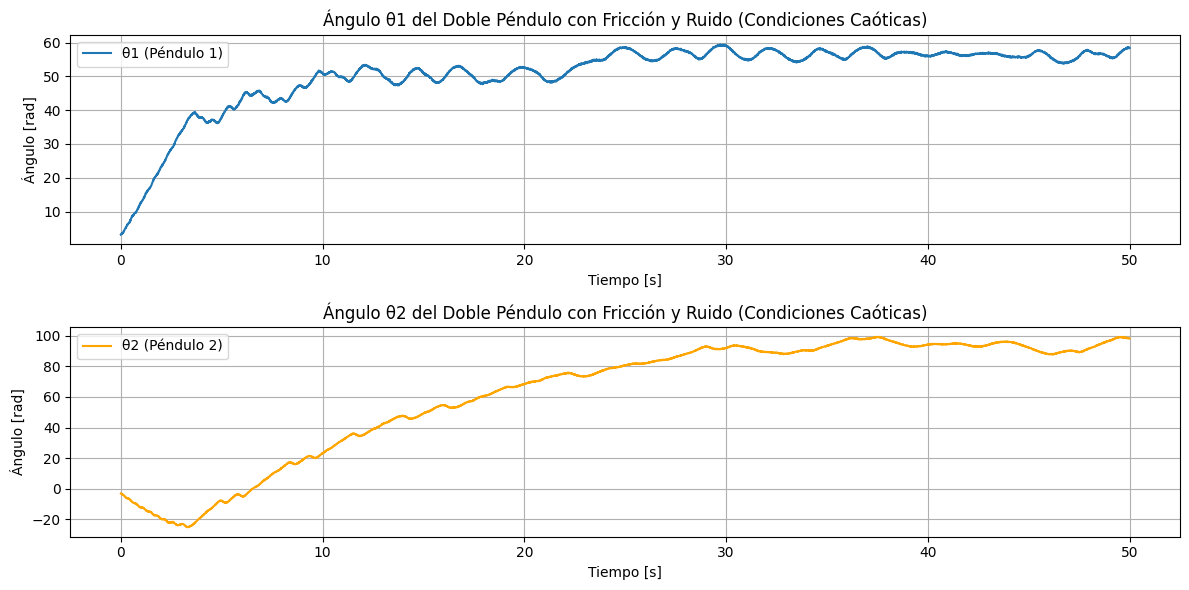

In [3]:
# Parámetros del doble péndulo
g = 9.81  
L1, L2 = 1.0, 1.0  # Longitudes de los péndulos
m1, m2 = 1.0, 1.0  # Masas
b1, b2 = 0.05, 0.05  # Fricción en las juntas
sigma = 0.1  # Ruido blanco gaussiano

# Condiciones iniciales caóticas
theta1_0, theta2_0 = np.radians(179), np.radians(-179)
omega1_0, omega2_0 = 5.0, -5.0
y0 = [theta1_0, omega1_0, theta2_0, omega2_0]

t_span = (0, 50)  
t_eval = np.linspace(t_span[0], t_span[1], 5000)  

# Ecuaciones del doble péndulo con fricción y ruido
def double_pendulum(t, y):
    theta1, omega1, theta2, omega2 = y

    noise1 = np.random.normal(0, sigma)
    noise2 = np.random.normal(0, sigma)

    delta_theta = theta2 - theta1

    M11 = (m1 + m2) * L1
    M12 = m2 * L2 * np.cos(delta_theta)
    M21 = L1 * np.cos(delta_theta)
    M22 = L2

    det = M11 * M22 - M12 * M21  # Determinante

    f1 = -m2 * L2 * omega2**2 * np.sin(delta_theta) - (m1 + m2) * g * np.sin(theta1) - b1 * omega1 + noise1
    f2 = L1 * omega1**2 * np.sin(delta_theta) - g * np.sin(theta2) - b2 * omega2 + noise2

    domega1_dt = (M22 * f1 - M12 * f2) / det
    domega2_dt = (-M21 * f1 + M11 * f2) / det

    return [omega1, domega1_dt, omega2, domega2_dt]

# Resolver ecuación diferencial
solution = solve_ivp(double_pendulum, t_span, y0, t_eval=t_eval)

# Extraer datos con ruido adicional
theta1_data = solution.y[0] + np.random.normal(0, sigma, size=len(t_eval))
theta2_data = solution.y[2] + np.random.normal(0, sigma, size=len(t_eval))

# Graficar theta1_data y theta2_data
plt.figure(figsize=(12, 6))

# Graficar theta1
plt.subplot(2, 1, 1)
plt.plot(t_eval, theta1_data, label="θ1 (Péndulo 1)")
plt.title("Ángulo θ1 del Doble Péndulo con Fricción y Ruido (Condiciones Caóticas)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Ángulo [rad]")
plt.grid(True)
plt.legend()

# Graficar theta2
plt.subplot(2, 1, 2)
plt.plot(t_eval, theta2_data, label="θ2 (Péndulo 2)", color="orange")
plt.title("Ángulo θ2 del Doble Péndulo con Fricción y Ruido (Condiciones Caóticas)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Ángulo [rad]")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Preparación de datos

In [4]:
# ============================================================
# 2) Construir dataset con ventanas deslizantes MULTIVARIABLE
# ============================================================
window_size = 100
X, Y = [], []  # Cada muestra: (window_size, 2); target: [θ1(t+1), θ2(t+1)]
for i in range(len(t_eval) - window_size):
    window_theta1 = theta1_data[i:i+window_size]
    window_theta2 = theta2_data[i:i+window_size]
    window_input = np.column_stack([window_theta1, window_theta2])
    target = [theta1_data[i+window_size], theta2_data[i+window_size]]
    X.append(window_input)
    Y.append(target)
X = np.array(X)  # Shape: (num_samples, window_size, 2)
Y = np.array(Y)  # Shape: (num_samples, 2)
print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (4900, 100, 2)
Y shape: (4900, 2)


In [5]:
# ============================================================
# 3) División time-based split: Train, Val, Test
# ============================================================
train_size = int(len(X) * 0.70)
val_size   = int(len(X) * 0.15)  # ~15% para validación
X_train, Y_train = X[:train_size], Y[:train_size]
X_val, Y_val = X[train_size:train_size + val_size], Y[train_size:train_size + val_size]
X_test, Y_test = X[train_size + val_size:], Y[train_size + val_size:]
print("Shapes:")
print("  X_train:", X_train.shape, "Y_train:", Y_train.shape)
print("  X_val:  ", X_val.shape,   "Y_val:  ", Y_val.shape)
print("  X_test: ", X_test.shape,  "Y_test: ", Y_test.shape)

Shapes:
  X_train: (3430, 100, 2) Y_train: (3430, 2)
  X_val:   (735, 100, 2) Y_val:   (735, 2)
  X_test:  (735, 100, 2) Y_test:  (735, 2)


In [6]:
# ============================================================
# 4) Escalado MinMax en 2 canales
# ============================================================
# Escalar X: aplanamos a 2D, ajustamos con el train y luego transformamos
scaler_x = MinMaxScaler(feature_range=(-1,1))
X_train_2d = X_train.reshape(-1, 2)
scaler_x.fit(X_train_2d)
X_train = scaler_x.transform(X_train_2d).reshape(X_train.shape)
X_val = scaler_x.transform(X_val.reshape(-1,2)).reshape(X_val.shape)
X_test = scaler_x.transform(X_test.reshape(-1,2)).reshape(X_test.shape)

# Escalar Y
scaler_y = MinMaxScaler(feature_range=(-1,1))
scaler_y.fit(Y_train)
Y_train = scaler_y.transform(Y_train)
Y_val = scaler_y.transform(Y_val)
Y_test = scaler_y.transform(Y_test)
print("X_train shape:", X_train.shape, "Y_train shape:", Y_train.shape)

X_train shape: (3430, 100, 2) Y_train shape: (3430, 2)


# Modelos

## ReLU

### Benchamark 512,256,128,64,32 - dropuout =0.2

In [ ]:
n_splits = 5

# TimeSeriesSplit con Expanding Window (sin max_train_size)
tscv_expanding = TimeSeriesSplit(n_splits=n_splits)

best_r2_expanding = -1e6
best_model_expanding = None
best_fold_expanding = None
fold_histories_expanding = []
fold_metrics_expanding = []

fold = 1
for train_index, val_index in tscv_expanding.split(X_train):
    print(f"Fold {fold} (Expanding)")
    X_train_exp, X_val_exp = X_train[train_index], X_train[val_index]
    Y_train_exp, Y_val_exp = Y_train[train_index], Y_train[val_index]

    # Definir modelo RNN (LSTM)
    model_exp = Sequential([
        LSTM(50, input_shape=(window_size, 2), return_sequences=True),
        LSTM(50, return_sequences=False),
        Dense(2)
    ])

    model_exp.compile(loss='mean_squared_error', optimizer=Adam(1e-4), metrics=['r2_score'])

    # Entrenar
    history_exp = model_exp.fit(
        X_train_exp, Y_train_exp,
        epochs=100,
        batch_size=32,
        validation_data=(X_val_exp, Y_val_exp),
        shuffle=False,
        verbose=1
    )

    fold_histories_expanding.append(history_exp.history)

    loss_exp, r2_exp = model_exp.evaluate(X_val_exp, Y_val_exp, verbose=1)
    fold_metrics_expanding.append({'fold': fold, 'loss': loss_exp, 'r2': r2_exp})
    print(f"Fold {fold} (Expanding) - Loss: {loss_exp:.4f}, R2: {r2_exp:.4f}\n")

    if r2_exp > best_r2_expanding:
        best_r2_expanding = r2_exp
        best_model_expanding = model_exp
        best_fold_expanding = fold

    fold += 1

print(f"Mejor fold (Expanding Window): Fold {best_fold_expanding} con R2={best_r2_expanding:.4f}")

# Visualización del mejor fold
best_history_exp = fold_histories_expanding[best_fold_expanding - 1]

Fold 1 (Expanding)


I0000 00:00:1742723040.485660    1130 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5558 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6
/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100


I0000 00:00:1742723042.623481    1231 service.cc:148] XLA service 0x7f2794002470 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742723042.623505    1231 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
I0000 00:00:1742723042.629267    1232 cuda_dnn.cc:529] Loaded cuDNN version 90800
I0000 00:00:1742723042.653460    1231 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2025-03-23 10:44:04.022930: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.4013 - r2_score: -193.8742 - val_loss: 0.1075 - val_r2_score: -3.8803
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - loss: 0.2306 - r2_score: -40.4727 - val_loss: 0.0725 - val_r2_score: -2.2589
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0861 - r2_score: -11.2825 - val_loss: 0.0166 - val_r2_score: 0.3182
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0453 - r2_score: -22.3656 - val_loss: 0.0200 - val_r2_score: 0.1785
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0529 - r2_score: -31.0816 - val_loss: 0.0294 - val_r2_score: -0.2056
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0541 - r2_score: -36.8850 - val_loss: 0.0103 - val_r2_score: 0.5307
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0272 - r2_score: -6.4089 - val_loss: 0.0087 - val_r2_score: 0.6090
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0233 - r2_score: -6.2133 - val_loss

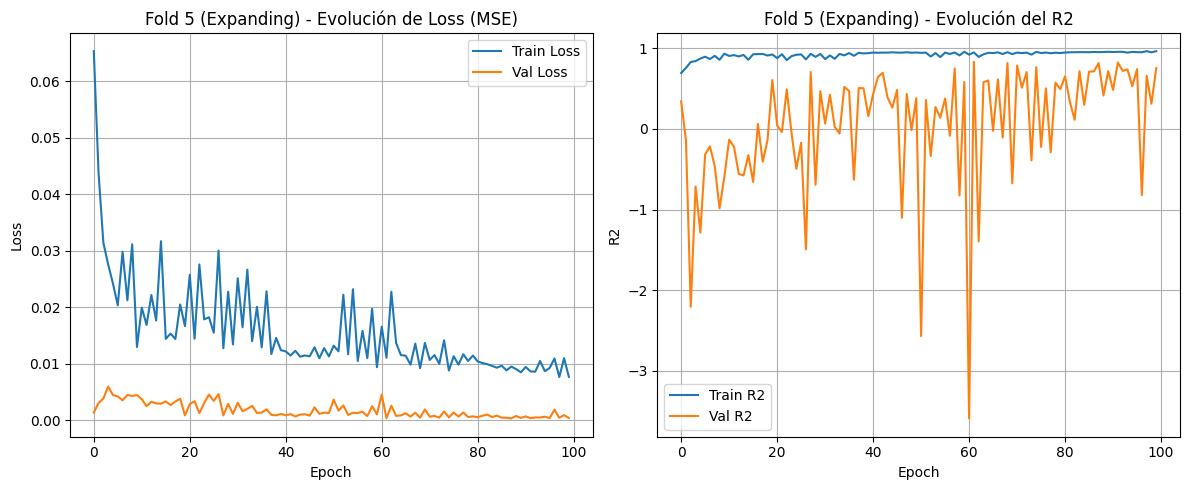

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(best_history_exp['loss'], label='Train Loss')
ax1.plot(best_history_exp['val_loss'], label='Val Loss')
ax1.set_title(f'Fold {best_fold_expanding} (Expanding) - Evolución de Loss (MSE)')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.legend()

ax2.plot(best_history_exp['r2_score'], label='Train R2')
ax2.plot(best_history_exp['val_r2_score'], label='Val R2')
ax2.set_title(f'Fold {best_fold_expanding} (Expanding) - Evolución del R2')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('R2')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


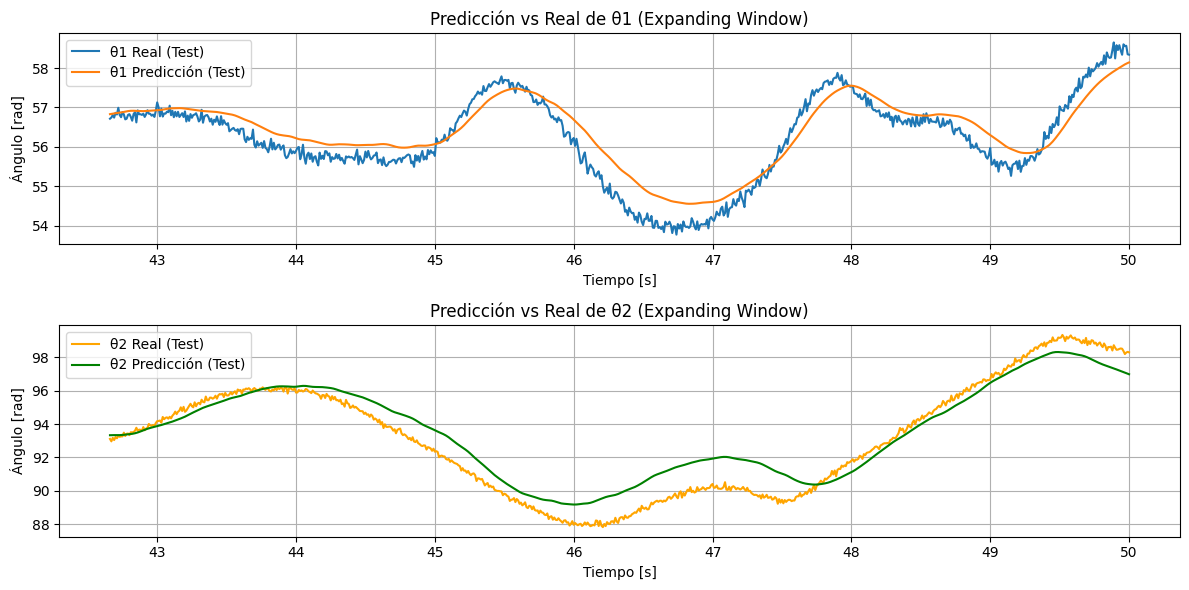

Métricas Globales en Test (Expanding Window):
MSE: 0.5833
MAE: 0.5954
R2: 0.8800


In [9]:
# Predicciones en Test con el mejor modelo (Expanding Window)
Y_pred_test_exp = best_model_expanding.predict(X_test)
Y_pred_test_exp_inv = scaler_y.inverse_transform(Y_pred_test_exp)
Y_test_inv = scaler_y.inverse_transform(Y_test)

# Eje de tiempo para test
test_index_start = (train_size + val_size) + window_size
t_test = t_eval[test_index_start:]

# Gráficas Predicción vs Real
plt.figure(figsize=(12,6))

# θ1
plt.subplot(2,1,1)
plt.plot(t_test, Y_test_inv[:,0], label='θ1 Real (Test)')
plt.plot(t_test, Y_pred_test_exp_inv[:,0], label='θ1 Predicción (Test)')
plt.title('Predicción vs Real de θ1 (Expanding Window)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.legend()
plt.grid(True)

# θ2
plt.subplot(2,1,2)
plt.plot(t_test, Y_test_inv[:,1], label='θ2 Real (Test)', color='orange')
plt.plot(t_test, Y_pred_test_exp_inv[:,1], label='θ2 Predicción (Test)', color='green')
plt.title('Predicción vs Real de θ2 (Expanding Window)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Métricas globales en test
mse_exp = mean_squared_error(Y_test_inv, Y_pred_test_exp_inv)
mae_exp = mean_absolute_error(Y_test_inv, Y_pred_test_exp_inv)
r2_exp_global = r2_score(Y_test_inv, Y_pred_test_exp_inv)

print("Métricas Globales en Test (Expanding Window):")
print(f"MSE: {mse_exp:.4f}")
print(f"MAE: {mae_exp:.4f}")
print(f"R2: {r2_exp_global:.4f}")

---

### reduce_lr

In [10]:
n_splits = 5

# TimeSeriesSplit con Expanding Window (sin max_train_size)
tscv_expanding = TimeSeriesSplit(n_splits=n_splits)

best_r2_expanding = -1e6
best_model_expanding = None
best_fold_expanding = None
fold_histories_expanding = []
fold_metrics_expanding = []

fold = 1
for train_index, val_index in tscv_expanding.split(X_train):
    print(f"Fold {fold} (Expanding)")
    X_train_exp, X_val_exp = X_train[train_index], X_train[val_index]
    Y_train_exp, Y_val_exp = Y_train[train_index], Y_train[val_index]

    # Definir modelo RNN (LSTM)
    model_exp = Sequential([
        LSTM(512, input_shape=(window_size, 2), return_sequences=True),
        Dropout(0.2),
        LSTM(256, return_sequences=True),
        Dropout(0.2),
        LSTM(128, return_sequences=True),
        Dropout(0.2),
        LSTM(64, return_sequences=True),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        Dropout(0.2),
        Dense(2)
    ])

    model_exp.compile(loss='mean_squared_error', optimizer=Adam(1e-4), metrics=['r2_score'])

    reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=1e-7, verbose=1)

    # Entrenar
    history_exp = model_exp.fit(
        X_train_exp, Y_train_exp,
        epochs=100,
        batch_size=32,
        validation_data=(X_val_exp, Y_val_exp),
        shuffle=False,
        callbacks=[reduce_lr],
        verbose=1
    )

    fold_histories_expanding.append(history_exp.history)

    loss_exp, r2_exp = model_exp.evaluate(X_val_exp, Y_val_exp, verbose=1)
    fold_metrics_expanding.append({'fold': fold, 'loss': loss_exp, 'r2': r2_exp})
    print(f"Fold {fold} (Expanding) - Loss: {loss_exp:.4f}, R2: {r2_exp:.4f}\n")

    if r2_exp > best_r2_expanding:
        best_r2_expanding = r2_exp
        best_model_expanding = model_exp
        best_fold_expanding = fold

    fold += 1

print(f"Mejor fold (Expanding Window): Fold {best_fold_expanding} con R2={best_r2_expanding:.4f}")

# Visualización del mejor fold
best_history_exp = fold_histories_expanding[best_fold_expanding - 1]

Fold 1 (Expanding)
Epoch 1/100


/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 0.3859 - r2_score: -174.2067 - val_loss: 0.0931 - val_r2_score: -3.2201 - learning_rate: 1.0000e-04
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - loss: 0.2068 - r2_score: -39.2336 - val_loss: 0.0563 - val_r2_score: -1.4003 - learning_rate: 1.0000e-04
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0595 - r2_score: -15.6499 - val_loss: 0.0046 - val_r2_score: 0.7907 - learning_rate: 1.0000e-04
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0344 - r2_score: -12.8110 - val_loss: 0.0402 - val_r2_score: -0.5580 - learning_rate: 1.0000e-04
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0778 - r2_score: -34.2280 - val_loss: 0.0116 - val_r2_score: 0.5420 - learning_rate: 1.0000e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0364 - r2_score: -20.4335 - val_loss: 0.0109 - val_r2_score: 0.5285 - learning_rate: 1.0000e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss:

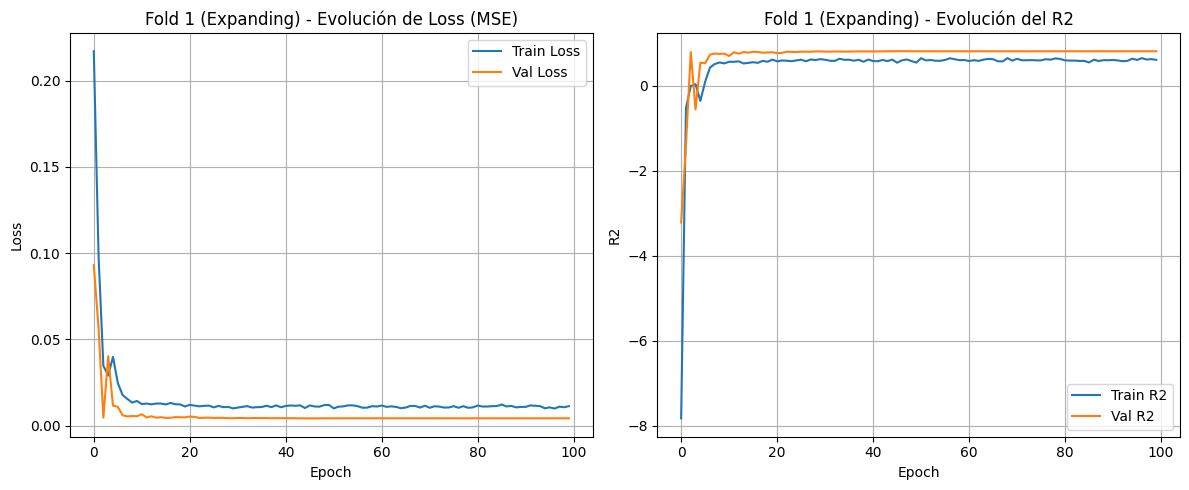

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(best_history_exp['loss'], label='Train Loss')
ax1.plot(best_history_exp['val_loss'], label='Val Loss')
ax1.set_title(f'Fold {best_fold_expanding} (Expanding) - Evolución de Loss (MSE)')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.legend()

ax2.plot(best_history_exp['r2_score'], label='Train R2')
ax2.plot(best_history_exp['val_r2_score'], label='Val R2')
ax2.set_title(f'Fold {best_fold_expanding} (Expanding) - Evolución del R2')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('R2')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


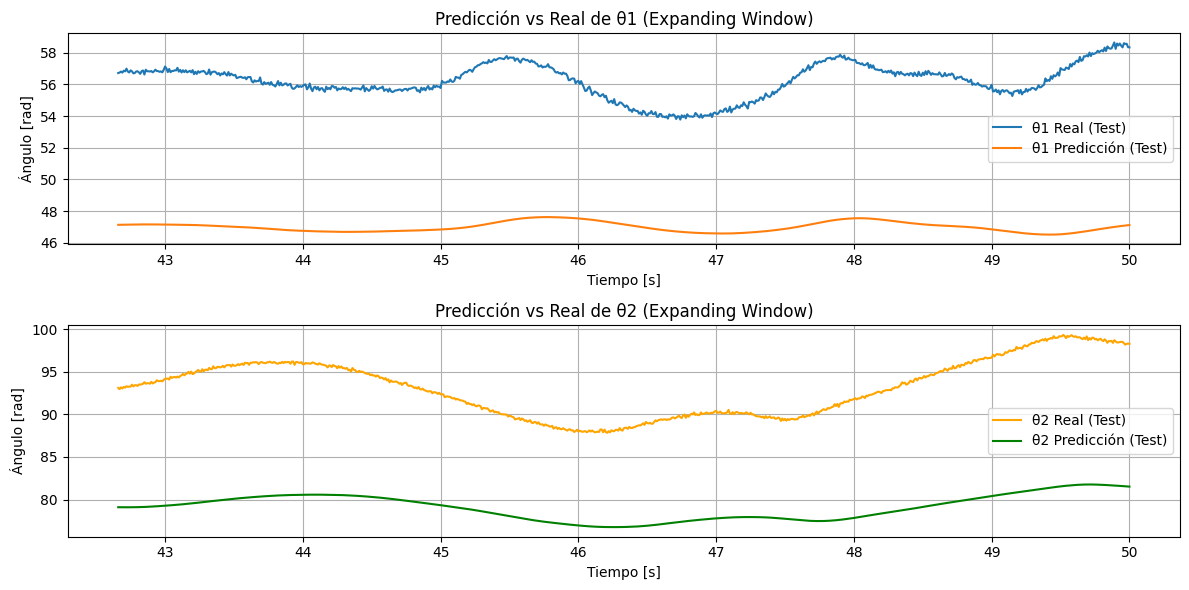

Métricas Globales en Test (Expanding Window):
MSE: 143.3899
MAE: 11.6295
R2: -45.3781


In [12]:
# Predicciones en Test con el mejor modelo (Expanding Window)
Y_pred_test_exp = best_model_expanding.predict(X_test)
Y_pred_test_exp_inv = scaler_y.inverse_transform(Y_pred_test_exp)
Y_test_inv = scaler_y.inverse_transform(Y_test)

# Eje de tiempo para test
test_index_start = (train_size + val_size) + window_size
t_test = t_eval[test_index_start:]

# Gráficas Predicción vs Real
plt.figure(figsize=(12,6))

# θ1
plt.subplot(2,1,1)
plt.plot(t_test, Y_test_inv[:,0], label='θ1 Real (Test)')
plt.plot(t_test, Y_pred_test_exp_inv[:,0], label='θ1 Predicción (Test)')
plt.title('Predicción vs Real de θ1 (Expanding Window)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.legend()
plt.grid(True)

# θ2
plt.subplot(2,1,2)
plt.plot(t_test, Y_test_inv[:,1], label='θ2 Real (Test)', color='orange')
plt.plot(t_test, Y_pred_test_exp_inv[:,1], label='θ2 Predicción (Test)', color='green')
plt.title('Predicción vs Real de θ2 (Expanding Window)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Métricas globales en test
mse_exp = mean_squared_error(Y_test_inv, Y_pred_test_exp_inv)
mae_exp = mean_absolute_error(Y_test_inv, Y_pred_test_exp_inv)
r2_exp_global = r2_score(Y_test_inv, Y_pred_test_exp_inv)

print("Métricas Globales en Test (Expanding Window):")
print(f"MSE: {mse_exp:.4f}")
print(f"MAE: {mae_exp:.4f}")
print(f"R2: {r2_exp_global:.4f}")

---

### Dropout(0.3) - BEST with relu

In [13]:
n_splits = 5

# TimeSeriesSplit con Expanding Window (sin max_train_size)
tscv_expanding = TimeSeriesSplit(n_splits=n_splits)

best_r2_expanding = -1e6
best_model_expanding = None
best_fold_expanding = None
fold_histories_expanding = []
fold_metrics_expanding = []

fold = 1
for train_index, val_index in tscv_expanding.split(X_train):
    print(f"Fold {fold} (Expanding)")
    X_train_exp, X_val_exp = X_train[train_index], X_train[val_index]
    Y_train_exp, Y_val_exp = Y_train[train_index], Y_train[val_index]

    # Definir modelo RNN (LSTM)
    model_exp = Sequential([
        LSTM(512, input_shape=(window_size, 2), return_sequences=True),
        Dropout(0.3),
        LSTM(256, return_sequences=True),
        Dropout(0.3),
        LSTM(128, return_sequences=True),
        Dropout(0.3),
        LSTM(64, return_sequences=True),
        Dropout(0.3),
        LSTM(32, return_sequences=False),
        Dropout(0.3),
        Dense(2)
    ])

    model_exp.compile(loss='mean_squared_error', optimizer=Adam(1e-4), metrics=['r2_score'])

    reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=1e-7, verbose=1)

    # Entrenar
    history_exp = model_exp.fit(
        X_train_exp, Y_train_exp,
        epochs=100,
        batch_size=32,
        validation_data=(X_val_exp, Y_val_exp),
        shuffle=False,
        callbacks=[reduce_lr],
        verbose=1
    )

    fold_histories_expanding.append(history_exp.history)

    loss_exp, r2_exp = model_exp.evaluate(X_val_exp, Y_val_exp, verbose=1)
    fold_metrics_expanding.append({'fold': fold, 'loss': loss_exp, 'r2': r2_exp})
    print(f"Fold {fold} (Expanding) - Loss: {loss_exp:.4f}, R2: {r2_exp:.4f}\n")

    if r2_exp > best_r2_expanding:
        best_r2_expanding = r2_exp
        best_model_expanding = model_exp
        best_fold_expanding = fold

    fold += 1

print(f"Mejor fold (Expanding Window): Fold {best_fold_expanding} con R2={best_r2_expanding:.4f}")

# Visualización del mejor fold
best_history_exp = fold_histories_expanding[best_fold_expanding - 1]

Fold 1 (Expanding)
Epoch 1/100


/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 0.3547 - r2_score: -174.9664 - val_loss: 0.0615 - val_r2_score: -1.7366 - learning_rate: 1.0000e-04
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - loss: 0.2639 - r2_score: -35.5285 - val_loss: 0.0269 - val_r2_score: -0.0249 - learning_rate: 1.0000e-04
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0615 - r2_score: -15.7320 - val_loss: 0.0042 - val_r2_score: 0.8236 - learning_rate: 1.0000e-04
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0463 - r2_score: -13.1662 - val_loss: 0.0053 - val_r2_score: 0.7658 - learning_rate: 1.0000e-04
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0596 - r2_score: -12.4069 - val_loss: 0.0038 - val_r2_score: 0.8277 - learning_rate: 1.0000e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0360 - r2_score: -9.4655 - val_loss: 0.0051 - val_r2_score: 0.8005 - learning_rate: 1.0000e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 

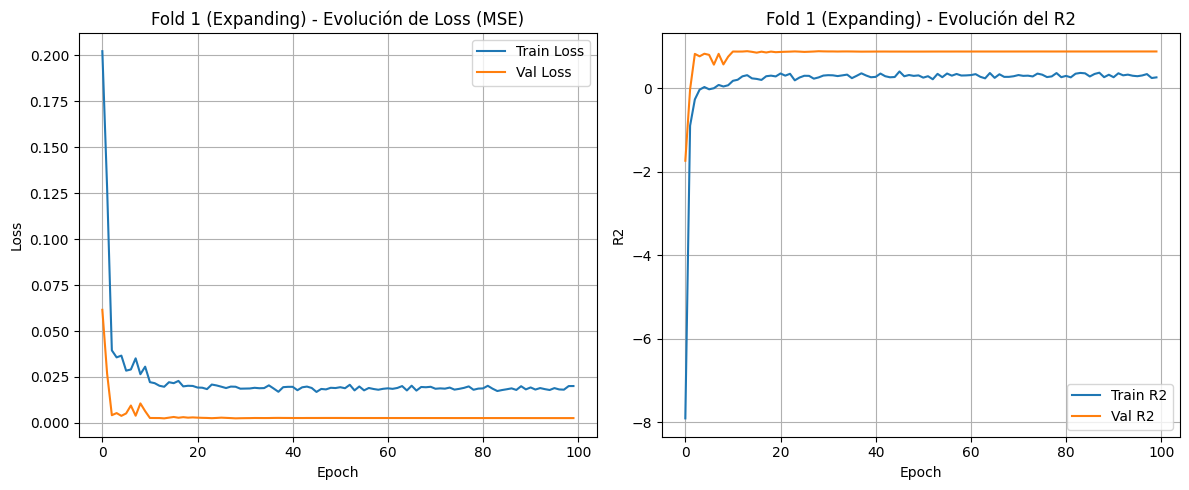

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(best_history_exp['loss'], label='Train Loss')
ax1.plot(best_history_exp['val_loss'], label='Val Loss')
ax1.set_title(f'Fold {best_fold_expanding} (Expanding) - Evolución de Loss (MSE)')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.legend()

ax2.plot(best_history_exp['r2_score'], label='Train R2')
ax2.plot(best_history_exp['val_r2_score'], label='Val R2')
ax2.set_title(f'Fold {best_fold_expanding} (Expanding) - Evolución del R2')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('R2')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


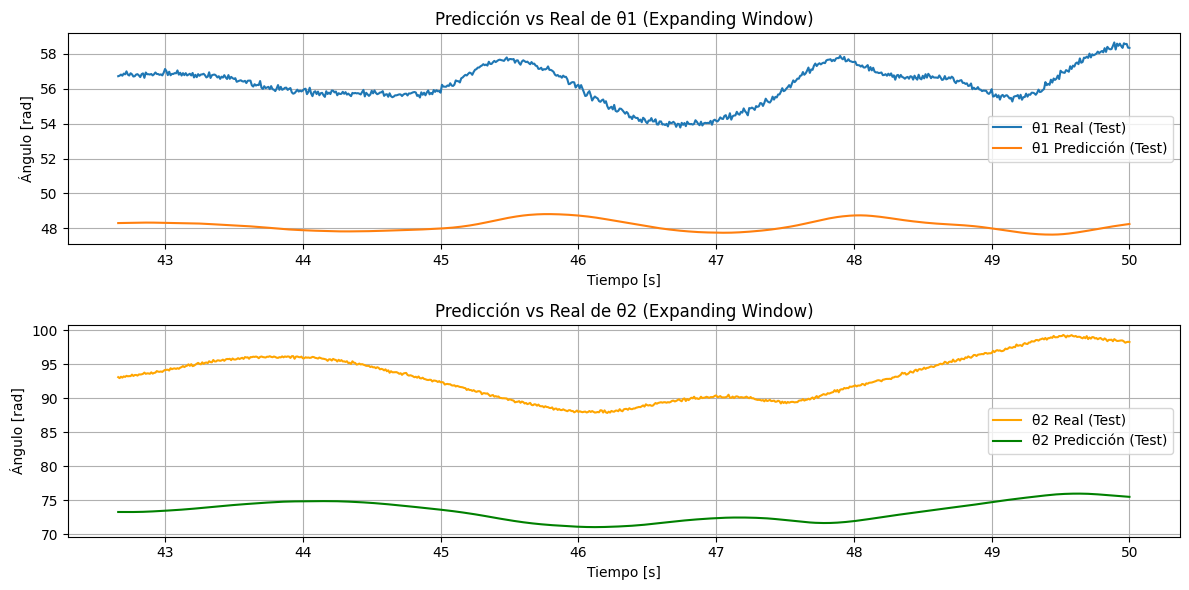

Métricas Globales en Test (Expanding Window):
MSE: 230.7678
MAE: 13.9235
R2: -45.5082


In [15]:
# Predicciones en Test con el mejor modelo (Expanding Window)
Y_pred_test_exp = best_model_expanding.predict(X_test)
Y_pred_test_exp_inv = scaler_y.inverse_transform(Y_pred_test_exp)
Y_test_inv = scaler_y.inverse_transform(Y_test)

# Eje de tiempo para test
test_index_start = (train_size + val_size) + window_size
t_test = t_eval[test_index_start:]

# Gráficas Predicción vs Real
plt.figure(figsize=(12,6))

# θ1
plt.subplot(2,1,1)
plt.plot(t_test, Y_test_inv[:,0], label='θ1 Real (Test)')
plt.plot(t_test, Y_pred_test_exp_inv[:,0], label='θ1 Predicción (Test)')
plt.title('Predicción vs Real de θ1 (Expanding Window)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.legend()
plt.grid(True)

# θ2
plt.subplot(2,1,2)
plt.plot(t_test, Y_test_inv[:,1], label='θ2 Real (Test)', color='orange')
plt.plot(t_test, Y_pred_test_exp_inv[:,1], label='θ2 Predicción (Test)', color='green')
plt.title('Predicción vs Real de θ2 (Expanding Window)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Métricas globales en test
mse_exp = mean_squared_error(Y_test_inv, Y_pred_test_exp_inv)
mae_exp = mean_absolute_error(Y_test_inv, Y_pred_test_exp_inv)
r2_exp_global = r2_score(Y_test_inv, Y_pred_test_exp_inv)

print("Métricas Globales en Test (Expanding Window):")
print(f"MSE: {mse_exp:.4f}")
print(f"MAE: {mae_exp:.4f}")
print(f"R2: {r2_exp_global:.4f}")

---

### kernel_regularizer=l2(1e-4), Dropout(0.2)

In [16]:
n_splits = 5

# TimeSeriesSplit con Expanding Window (sin max_train_size)
tscv_expanding = TimeSeriesSplit(n_splits=n_splits)

best_r2_expanding = -1e6
best_model_expanding = None
best_fold_expanding = None
fold_histories_expanding = []
fold_metrics_expanding = []

fold = 1
for train_index, val_index in tscv_expanding.split(X_train):
    print(f"Fold {fold} (Expanding)")
    X_train_exp, X_val_exp = X_train[train_index], X_train[val_index]
    Y_train_exp, Y_val_exp = Y_train[train_index], Y_train[val_index]

    # Definir modelo RNN (LSTM)
    model_exp = Sequential([
        LSTM(512, input_shape=(window_size, 2), return_sequences=True, kernel_regularizer=l2(1e-4)),
        Dropout(0.2),
        LSTM(256, return_sequences=True, kernel_regularizer=l2(1e-4)),
        Dropout(0.2),
        LSTM(128, return_sequences=True, kernel_regularizer=l2(1e-4)),
        Dropout(0.2),
        LSTM(64, return_sequences=True, kernel_regularizer=l2(1e-4)),
        Dropout(0.2),
        LSTM(32, return_sequences=False, kernel_regularizer=l2(1e-4)),
        Dropout(0.2),
        Dense(2)
    ])

    model_exp.compile(loss='mean_squared_error', optimizer=Adam(1e-4), metrics=['r2_score'])

    reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=1e-7, verbose=1)

    # Entrenar
    history_exp = model_exp.fit(
        X_train_exp, Y_train_exp,
        epochs=100,
        batch_size=32,
        validation_data=(X_val_exp, Y_val_exp),
        shuffle=False,
        callbacks=[reduce_lr],
        verbose=1
    )

    fold_histories_expanding.append(history_exp.history)

    loss_exp, r2_exp = model_exp.evaluate(X_val_exp, Y_val_exp, verbose=1)
    fold_metrics_expanding.append({'fold': fold, 'loss': loss_exp, 'r2': r2_exp})
    print(f"Fold {fold} (Expanding) - Loss: {loss_exp:.4f}, R2: {r2_exp:.4f}\n")

    if r2_exp > best_r2_expanding:
        best_r2_expanding = r2_exp
        best_model_expanding = model_exp
        best_fold_expanding = fold

    fold += 1

print(f"Mejor fold (Expanding Window): Fold {best_fold_expanding} con R2={best_r2_expanding:.4f}")

# Visualización del mejor fold
best_history_exp = fold_histories_expanding[best_fold_expanding - 1]

Fold 1 (Expanding)
Epoch 1/100


/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 0.5135 - r2_score: -166.9031 - val_loss: 0.2185 - val_r2_score: -3.1477 - learning_rate: 1.0000e-04
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - loss: 0.3545 - r2_score: -30.8391 - val_loss: 0.1780 - val_r2_score: -1.2817 - learning_rate: 1.0000e-04
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2059 - r2_score: -13.8789 - val_loss: 0.1369 - val_r2_score: 0.4163 - learning_rate: 1.0000e-04
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1749 - r2_score: -11.8210 - val_loss: 0.1376 - val_r2_score: 0.1407 - learning_rate: 1.0000e-04
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2224 - r2_score: -13.3771 - val_loss: 0.1206 - val_r2_score: 0.8159 - learning_rate: 1.0000e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1522 - r2_score: -6.6590 - val_loss: 0.1175 - val_r2_score: 0.8551 - learning_rate: 1.0000e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 

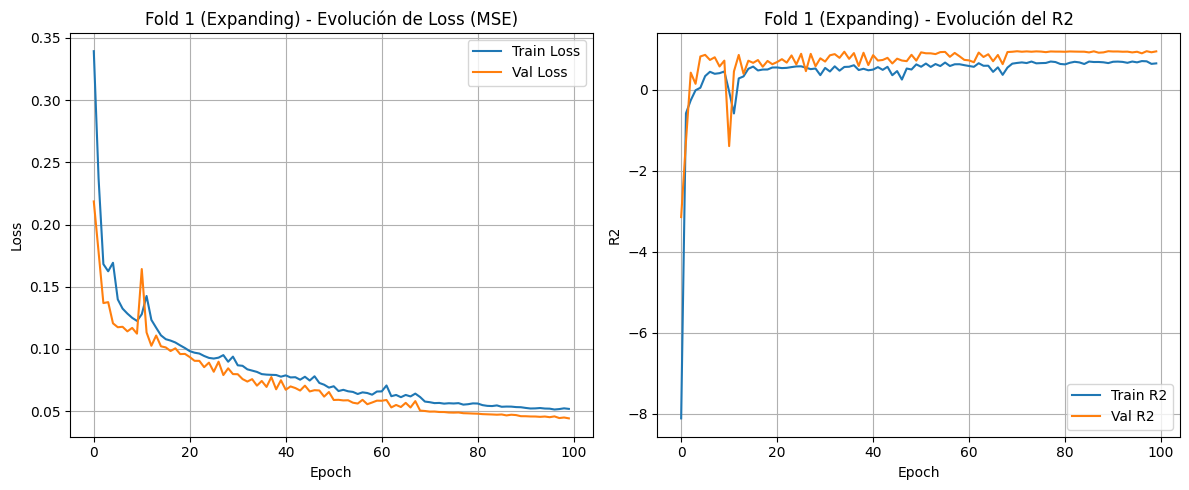

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(best_history_exp['loss'], label='Train Loss')
ax1.plot(best_history_exp['val_loss'], label='Val Loss')
ax1.set_title(f'Fold {best_fold_expanding} (Expanding) - Evolución de Loss (MSE)')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.legend()

ax2.plot(best_history_exp['r2_score'], label='Train R2')
ax2.plot(best_history_exp['val_r2_score'], label='Val R2')
ax2.set_title(f'Fold {best_fold_expanding} (Expanding) - Evolución del R2')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('R2')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


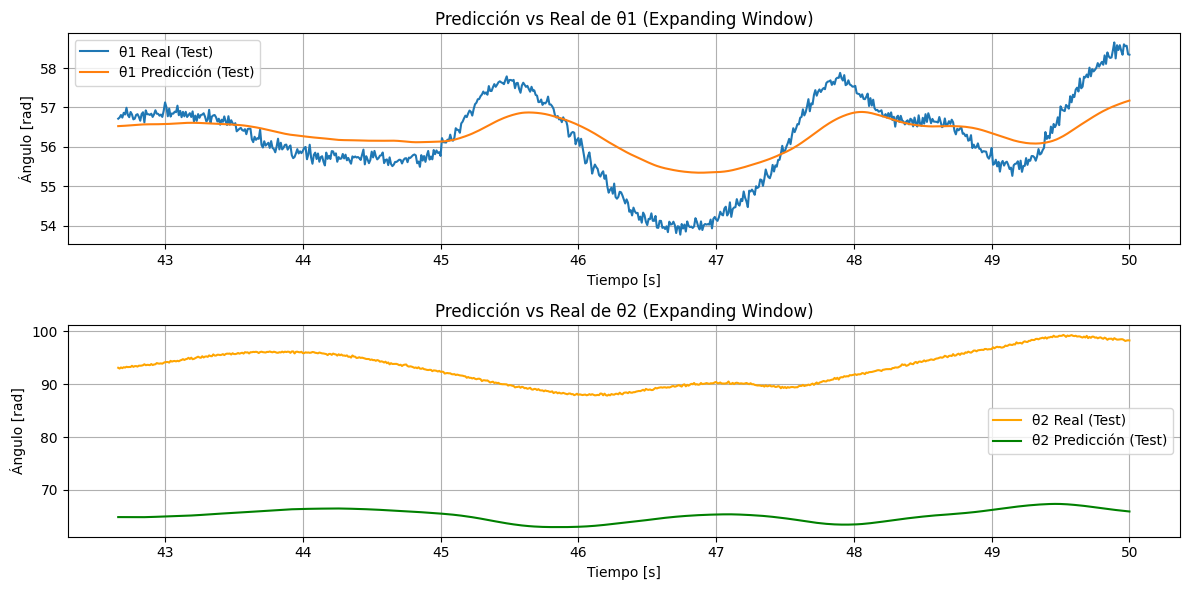

Métricas Globales en Test (Expanding Window):
MSE: 394.6482
MAE: 14.2801
R2: -35.1454


In [18]:
# Predicciones en Test con el mejor modelo (Expanding Window)
Y_pred_test_exp = best_model_expanding.predict(X_test)
Y_pred_test_exp_inv = scaler_y.inverse_transform(Y_pred_test_exp)
Y_test_inv = scaler_y.inverse_transform(Y_test)

# Eje de tiempo para test
test_index_start = (train_size + val_size) + window_size
t_test = t_eval[test_index_start:]

# Gráficas Predicción vs Real
plt.figure(figsize=(12,6))

# θ1
plt.subplot(2,1,1)
plt.plot(t_test, Y_test_inv[:,0], label='θ1 Real (Test)')
plt.plot(t_test, Y_pred_test_exp_inv[:,0], label='θ1 Predicción (Test)')
plt.title('Predicción vs Real de θ1 (Expanding Window)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.legend()
plt.grid(True)

# θ2
plt.subplot(2,1,2)
plt.plot(t_test, Y_test_inv[:,1], label='θ2 Real (Test)', color='orange')
plt.plot(t_test, Y_pred_test_exp_inv[:,1], label='θ2 Predicción (Test)', color='green')
plt.title('Predicción vs Real de θ2 (Expanding Window)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Métricas globales en test
mse_exp = mean_squared_error(Y_test_inv, Y_pred_test_exp_inv)
mae_exp = mean_absolute_error(Y_test_inv, Y_pred_test_exp_inv)
r2_exp_global = r2_score(Y_test_inv, Y_pred_test_exp_inv)

print("Métricas Globales en Test (Expanding Window):")
print(f"MSE: {mse_exp:.4f}")
print(f"MAE: {mae_exp:.4f}")
print(f"R2: {r2_exp_global:.4f}")

---

### kernel_regularizer=l2(1e-5) , Dropout(0.3)

In [19]:
n_splits = 5

# TimeSeriesSplit con Expanding Window (sin max_train_size)
tscv_expanding = TimeSeriesSplit(n_splits=n_splits)

best_r2_expanding = -1e6
best_model_expanding = None
best_fold_expanding = None
fold_histories_expanding = []
fold_metrics_expanding = []

fold = 1
for train_index, val_index in tscv_expanding.split(X_train):
    print(f"Fold {fold} (Expanding)")
    X_train_exp, X_val_exp = X_train[train_index], X_train[val_index]
    Y_train_exp, Y_val_exp = Y_train[train_index], Y_train[val_index]

    # Definir modelo RNN (LSTM)
    model_exp = Sequential([
        LSTM(512, input_shape=(window_size, 2), return_sequences=True, kernel_regularizer=l2(1e-5)),
        Dropout(0.3),
        LSTM(256, return_sequences=True, kernel_regularizer=l2(1e-5)),
        Dropout(0.3),
        LSTM(128, return_sequences=True, kernel_regularizer=l2(1e-5)),
        Dropout(0.3),
        LSTM(64, return_sequences=True, kernel_regularizer=l2(1e-5)),
        Dropout(0.3),
        LSTM(32, return_sequences=False, kernel_regularizer=l2(1e-5)),
        Dropout(0.3),
        Dense(2)
    ])

    model_exp.compile(loss='mean_squared_error', optimizer=Adam(1e-4), metrics=['r2_score'])

    reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=1e-7, verbose=1)

    # Entrenar
    history_exp = model_exp.fit(
        X_train_exp, Y_train_exp,
        epochs=100,
        batch_size=32,
        validation_data=(X_val_exp, Y_val_exp),
        shuffle=False,
        callbacks=[reduce_lr],
        verbose=1
    )

    fold_histories_expanding.append(history_exp.history)

    loss_exp, r2_exp = model_exp.evaluate(X_val_exp, Y_val_exp, verbose=1)
    fold_metrics_expanding.append({'fold': fold, 'loss': loss_exp, 'r2': r2_exp})
    print(f"Fold {fold} (Expanding) - Loss: {loss_exp:.4f}, R2: {r2_exp:.4f}\n")

    if r2_exp > best_r2_expanding:
        best_r2_expanding = r2_exp
        best_model_expanding = model_exp
        best_fold_expanding = fold

    fold += 1

print(f"Mejor fold (Expanding Window): Fold {best_fold_expanding} con R2={best_r2_expanding:.4f}")

# Visualización del mejor fold
best_history_exp = fold_histories_expanding[best_fold_expanding - 1]

Fold 1 (Expanding)
Epoch 1/100


/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.4256 - r2_score: -184.5897 - val_loss: 0.1188 - val_r2_score: -3.7952 - learning_rate: 1.0000e-04
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - loss: 0.2594 - r2_score: -45.1776 - val_loss: 0.0894 - val_r2_score: -2.4714 - learning_rate: 1.0000e-04
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1292 - r2_score: -18.8872 - val_loss: 0.0351 - val_r2_score: 0.0553 - learning_rate: 1.0000e-04
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0665 - r2_score: -16.3562 - val_loss: 0.0227 - val_r2_score: 0.5478 - learning_rate: 1.0000e-04
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0556 - r2_score: -17.8897 - val_loss: 0.0493 - val_r2_score: -0.6453 - learning_rate: 1.0000e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0899 - r2_score: -27.3435 - val_loss: 0.0225 - val_r2_score: 0.5511 - learning_rate: 1.0000e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss

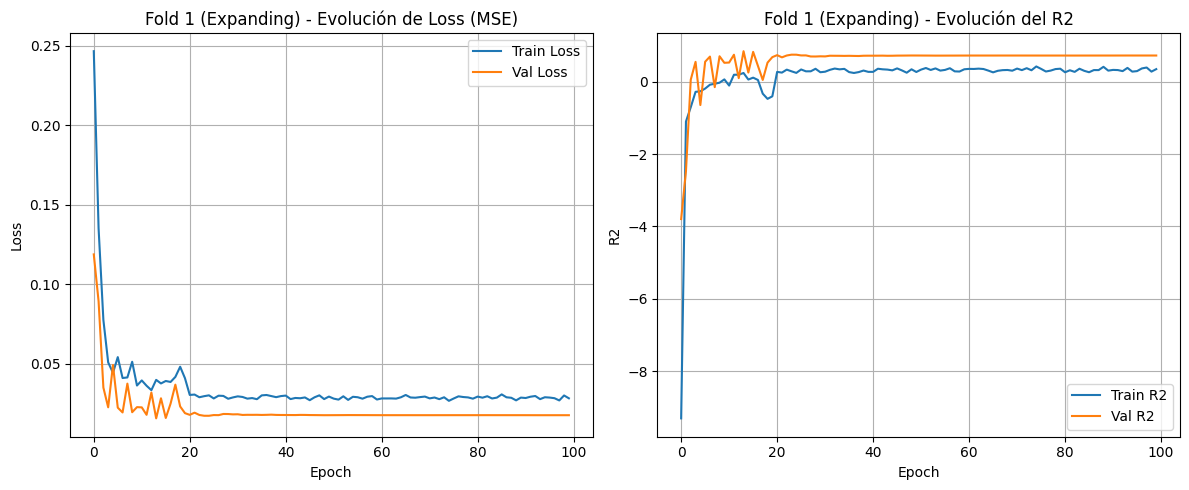

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(best_history_exp['loss'], label='Train Loss')
ax1.plot(best_history_exp['val_loss'], label='Val Loss')
ax1.set_title(f'Fold {best_fold_expanding} (Expanding) - Evolución de Loss (MSE)')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.legend()

ax2.plot(best_history_exp['r2_score'], label='Train R2')
ax2.plot(best_history_exp['val_r2_score'], label='Val R2')
ax2.set_title(f'Fold {best_fold_expanding} (Expanding) - Evolución del R2')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('R2')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


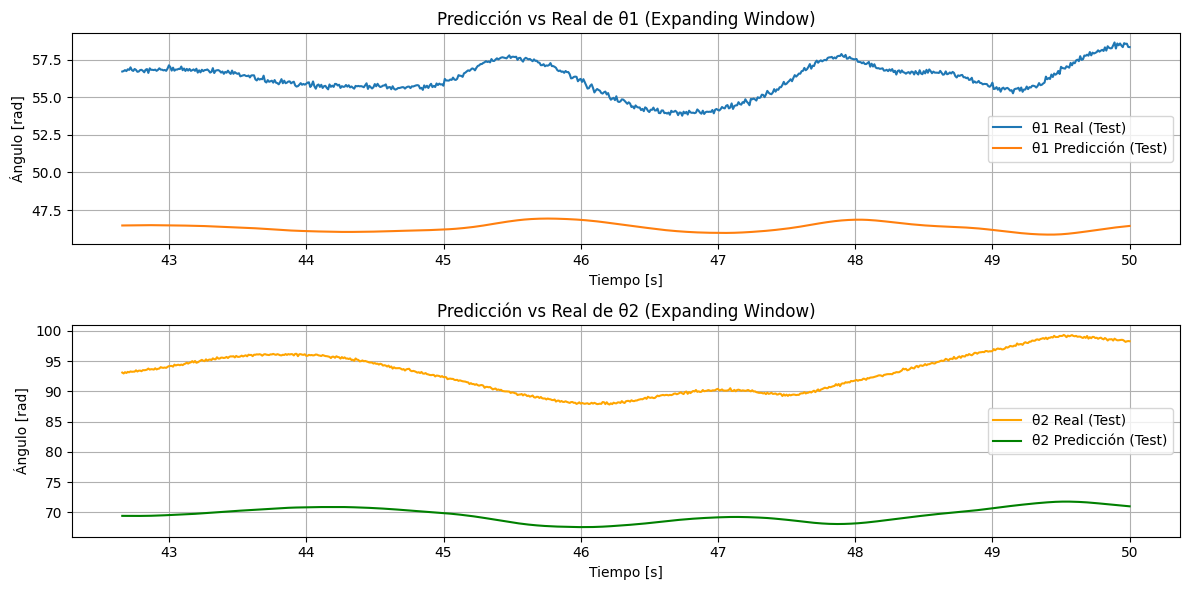

Métricas Globales en Test (Expanding Window):
MSE: 328.5259
MAE: 16.6974
R2: -67.0337


In [21]:
# Predicciones en Test con el mejor modelo (Expanding Window)
Y_pred_test_exp = best_model_expanding.predict(X_test)
Y_pred_test_exp_inv = scaler_y.inverse_transform(Y_pred_test_exp)
Y_test_inv = scaler_y.inverse_transform(Y_test)

# Eje de tiempo para test
test_index_start = (train_size + val_size) + window_size
t_test = t_eval[test_index_start:]

# Gráficas Predicción vs Real
plt.figure(figsize=(12,6))

# θ1
plt.subplot(2,1,1)
plt.plot(t_test, Y_test_inv[:,0], label='θ1 Real (Test)')
plt.plot(t_test, Y_pred_test_exp_inv[:,0], label='θ1 Predicción (Test)')
plt.title('Predicción vs Real de θ1 (Expanding Window)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.legend()
plt.grid(True)

# θ2
plt.subplot(2,1,2)
plt.plot(t_test, Y_test_inv[:,1], label='θ2 Real (Test)', color='orange')
plt.plot(t_test, Y_pred_test_exp_inv[:,1], label='θ2 Predicción (Test)', color='green')
plt.title('Predicción vs Real de θ2 (Expanding Window)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Métricas globales en test
mse_exp = mean_squared_error(Y_test_inv, Y_pred_test_exp_inv)
mae_exp = mean_absolute_error(Y_test_inv, Y_pred_test_exp_inv)
r2_exp_global = r2_score(Y_test_inv, Y_pred_test_exp_inv)

print("Métricas Globales en Test (Expanding Window):")
print(f"MSE: {mse_exp:.4f}")
print(f"MAE: {mae_exp:.4f}")
print(f"R2: {r2_exp_global:.4f}")

---

### LayerNormalization

In [22]:
from tensorflow.keras.layers import LSTM, LayerNormalization

n_splits = 5

# TimeSeriesSplit con Expanding Window (sin max_train_size)
tscv_expanding = TimeSeriesSplit(n_splits=n_splits)

best_r2_expanding = -1e6
best_model_expanding = None
best_fold_expanding = None
fold_histories_expanding = []
fold_metrics_expanding = []

fold = 1
for train_index, val_index in tscv_expanding.split(X_train):
    print(f"Fold {fold} (Expanding)")
    X_train_exp, X_val_exp = X_train[train_index], X_train[val_index]
    Y_train_exp, Y_val_exp = Y_train[train_index], Y_train[val_index]

    # Definir modelo RNN (LSTM)
    model_exp = Sequential([
        LSTM(512, input_shape=(window_size, 2), return_sequences=True, kernel_regularizer=l2(1e-5)),
        LayerNormalization(),
        Dropout(0.2),
        LSTM(256, return_sequences=True, kernel_regularizer=l2(1e-5)),
        LayerNormalization(),
        Dropout(0.2),
        LSTM(128, return_sequences=True, kernel_regularizer=l2(1e-5)),
        LayerNormalization(),
        Dropout(0.2),
        LSTM(64, return_sequences=True, kernel_regularizer=l2(1e-5)),
        LayerNormalization(),
        Dropout(0.2),
        LSTM(32, return_sequences=False, kernel_regularizer=l2(1e-5)),
        LayerNormalization(),
        Dropout(0.2),
        Dense(2)
    ])

    model_exp.compile(loss='mean_squared_error', optimizer=Adam(1e-4), metrics=['r2_score'])

    reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=1e-7, verbose=1)

    # Entrenar
    history_exp = model_exp.fit(
        X_train_exp, Y_train_exp,
        epochs=100,
        batch_size=32,
        validation_data=(X_val_exp, Y_val_exp),
        shuffle=False,
        callbacks=[reduce_lr],
        verbose=1
    )

    fold_histories_expanding.append(history_exp.history)

    loss_exp, r2_exp = model_exp.evaluate(X_val_exp, Y_val_exp, verbose=1)
    fold_metrics_expanding.append({'fold': fold, 'loss': loss_exp, 'r2': r2_exp})
    print(f"Fold {fold} (Expanding) - Loss: {loss_exp:.4f}, R2: {r2_exp:.4f}\n")

    if r2_exp > best_r2_expanding:
        best_r2_expanding = r2_exp
        best_model_expanding = model_exp
        best_fold_expanding = fold

    fold += 1

print(f"Mejor fold (Expanding Window): Fold {best_fold_expanding} con R2={best_r2_expanding:.4f}")

# Visualización del mejor fold
best_history_exp = fold_histories_expanding[best_fold_expanding - 1]

Fold 1 (Expanding)
Epoch 1/100


/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-03-23 11:56:10.839513: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'input_add_multiply_reduce_fusion', 76 bytes spill stores, 76 bytes spill loads



18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - loss: 2.2635 - r2_score: -445.7399 - val_loss: 0.5238 - val_r2_score: -19.4287 - learning_rate: 1.0000e-04
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step - loss: 0.8183 - r2_score: -204.6769 - val_loss: 0.6278 - val_r2_score: -26.5313 - learning_rate: 1.0000e-04
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.6310 - r2_score: -141.8705 - val_loss: 0.3903 - val_r2_score: -16.0441 - learning_rate: 1.0000e-04
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.5751 - r2_score: -124.0989 - val_loss: 0.4314 - val_r2_score: -18.0631 - learning_rate: 1.0000e-04
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.5737 - r2_score: -125.2899 - val_loss: 0.2368 - val_r2_score: -9.0360 - learning_rate: 1.0000e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.5226 - r2_score: -167.1513 - val_loss: 0.2541 - val_r2_score: -9.5369 - learning_rate: 1.0000e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms

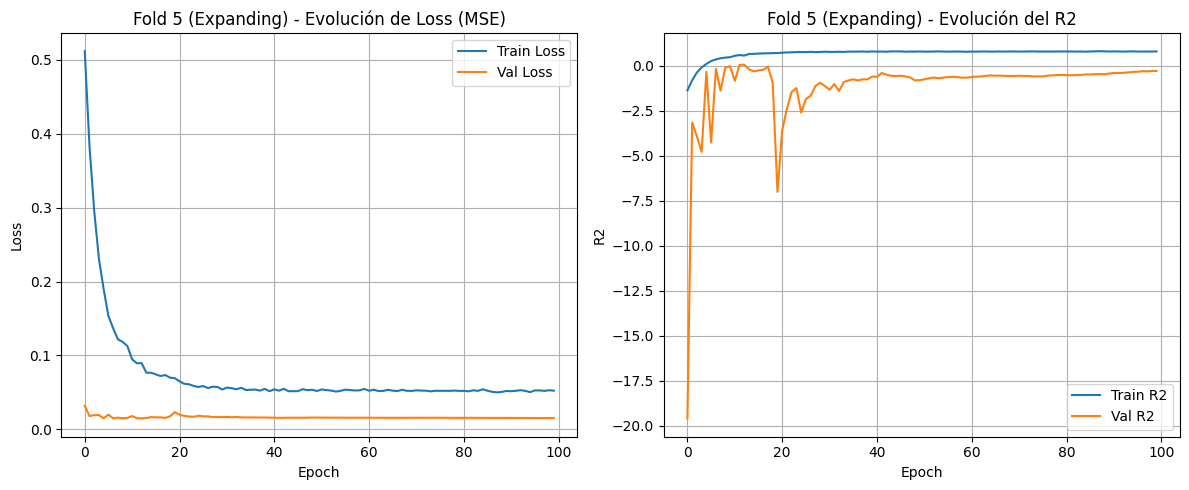

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(best_history_exp['loss'], label='Train Loss')
ax1.plot(best_history_exp['val_loss'], label='Val Loss')
ax1.set_title(f'Fold {best_fold_expanding} (Expanding) - Evolución de Loss (MSE)')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.legend()

ax2.plot(best_history_exp['r2_score'], label='Train R2')
ax2.plot(best_history_exp['val_r2_score'], label='Val R2')
ax2.set_title(f'Fold {best_fold_expanding} (Expanding) - Evolución del R2')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('R2')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step


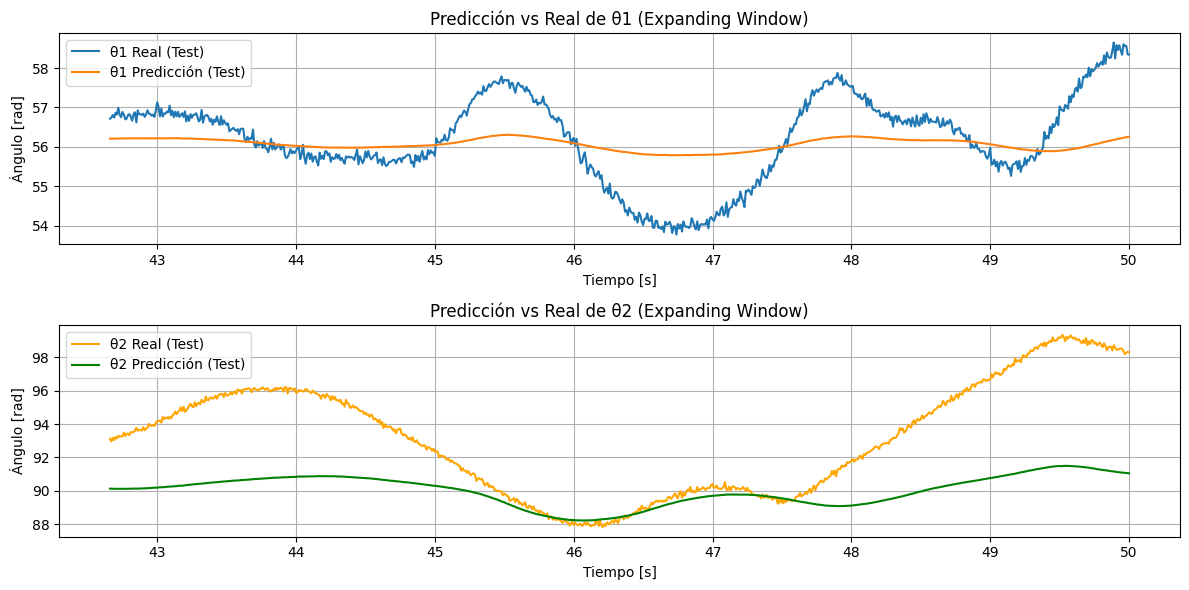

Métricas Globales en Test (Expanding Window):
MSE: 8.5089
MAE: 1.9631
R2: -0.1359


In [24]:
# Predicciones en Test con el mejor modelo (Expanding Window)
Y_pred_test_exp = best_model_expanding.predict(X_test)
Y_pred_test_exp_inv = scaler_y.inverse_transform(Y_pred_test_exp)
Y_test_inv = scaler_y.inverse_transform(Y_test)

# Eje de tiempo para test
test_index_start = (train_size + val_size) + window_size
t_test = t_eval[test_index_start:]

# Gráficas Predicción vs Real
plt.figure(figsize=(12,6))

# θ1
plt.subplot(2,1,1)
plt.plot(t_test, Y_test_inv[:,0], label='θ1 Real (Test)')
plt.plot(t_test, Y_pred_test_exp_inv[:,0], label='θ1 Predicción (Test)')
plt.title('Predicción vs Real de θ1 (Expanding Window)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.legend()
plt.grid(True)

# θ2
plt.subplot(2,1,2)
plt.plot(t_test, Y_test_inv[:,1], label='θ2 Real (Test)', color='orange')
plt.plot(t_test, Y_pred_test_exp_inv[:,1], label='θ2 Predicción (Test)', color='green')
plt.title('Predicción vs Real de θ2 (Expanding Window)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Métricas globales en test
mse_exp = mean_squared_error(Y_test_inv, Y_pred_test_exp_inv)
mae_exp = mean_absolute_error(Y_test_inv, Y_pred_test_exp_inv)
r2_exp_global = r2_score(Y_test_inv, Y_pred_test_exp_inv)

print("Métricas Globales en Test (Expanding Window):")
print(f"MSE: {mse_exp:.4f}")
print(f"MAE: {mae_exp:.4f}")
print(f"R2: {r2_exp_global:.4f}")

---

### dropout = 0.4

In [25]:
n_splits = 5

# TimeSeriesSplit con Expanding Window (sin max_train_size)
tscv_expanding = TimeSeriesSplit(n_splits=n_splits)

best_r2_expanding = -1e6
best_model_expanding = None
best_fold_expanding = None
fold_histories_expanding = []
fold_metrics_expanding = []

fold = 1
for train_index, val_index in tscv_expanding.split(X_train):
    print(f"Fold {fold} (Expanding)")
    X_train_exp, X_val_exp = X_train[train_index], X_train[val_index]
    Y_train_exp, Y_val_exp = Y_train[train_index], Y_train[val_index]

    # Definir modelo RNN (LSTM)
    model_exp = Sequential([
        LSTM(512, input_shape=(window_size, 2), return_sequences=True),
        Dropout(0.4),
        LSTM(256, return_sequences=True),
        Dropout(0.4),
        LSTM(128, return_sequences=True),
        Dropout(0.4),
        LSTM(64, return_sequences=True),
        Dropout(0.4),
        LSTM(32, return_sequences=False),
        Dropout(0.4),
        Dense(2)
    ])

    model_exp.compile(loss='mean_squared_error', optimizer=Adam(1e-4), metrics=['r2_score'])

    reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=1e-7, verbose=1)

    # Entrenar
    history_exp = model_exp.fit(
        X_train_exp, Y_train_exp,
        epochs=100,
        batch_size=32,
        validation_data=(X_val_exp, Y_val_exp),
        shuffle=False,
        callbacks=[reduce_lr],
        verbose=1
    )

    fold_histories_expanding.append(history_exp.history)

    loss_exp, r2_exp = model_exp.evaluate(X_val_exp, Y_val_exp, verbose=1)
    fold_metrics_expanding.append({'fold': fold, 'loss': loss_exp, 'r2': r2_exp})
    print(f"Fold {fold} (Expanding) - Loss: {loss_exp:.4f}, R2: {r2_exp:.4f}\n")

    if r2_exp > best_r2_expanding:
        best_r2_expanding = r2_exp
        best_model_expanding = model_exp
        best_fold_expanding = fold

    fold += 1

print(f"Mejor fold (Expanding Window): Fold {best_fold_expanding} con R2={best_r2_expanding:.4f}")

# Visualización del mejor fold
best_history_exp = fold_histories_expanding[best_fold_expanding - 1]

Fold 1 (Expanding)
Epoch 1/100


/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 0.3947 - r2_score: -166.1282 - val_loss: 0.0905 - val_r2_score: -3.0932 - learning_rate: 1.0000e-04
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - loss: 0.2609 - r2_score: -35.1602 - val_loss: 0.0573 - val_r2_score: -1.5651 - learning_rate: 1.0000e-04
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0866 - r2_score: -15.6872 - val_loss: 0.0142 - val_r2_score: 0.4448 - learning_rate: 1.0000e-04
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0606 - r2_score: -21.1831 - val_loss: 0.0168 - val_r2_score: 0.2428 - learning_rate: 1.0000e-04
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0826 - r2_score: -16.3834 - val_loss: 0.0031 - val_r2_score: 0.8620 - learning_rate: 1.0000e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0429 - r2_score: -14.8443 - val_loss: 0.0154 - val_r2_score: 0.3723 - learning_rate: 1.0000e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss:

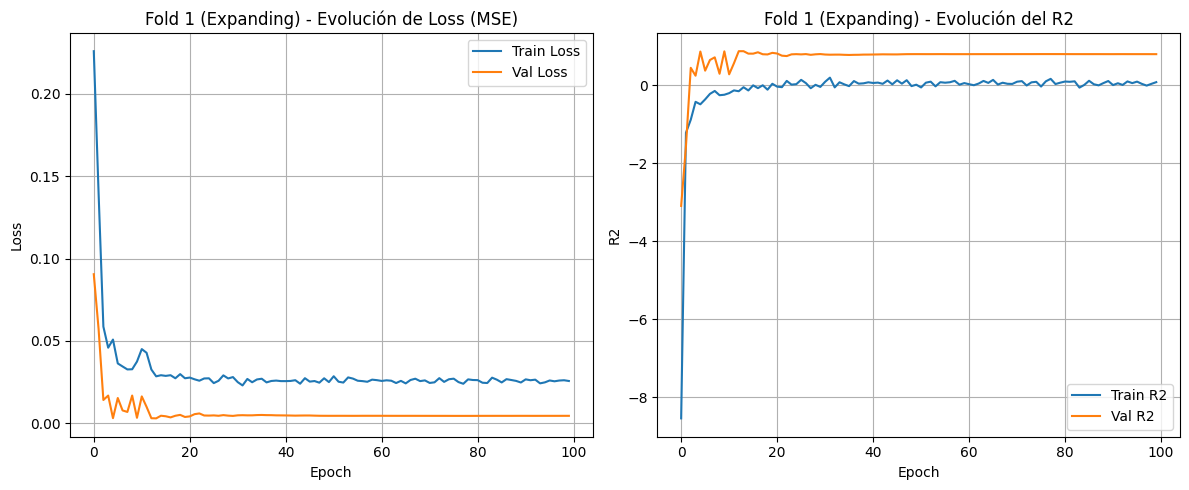

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(best_history_exp['loss'], label='Train Loss')
ax1.plot(best_history_exp['val_loss'], label='Val Loss')
ax1.set_title(f'Fold {best_fold_expanding} (Expanding) - Evolución de Loss (MSE)')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.legend()

ax2.plot(best_history_exp['r2_score'], label='Train R2')
ax2.plot(best_history_exp['val_r2_score'], label='Val R2')
ax2.set_title(f'Fold {best_fold_expanding} (Expanding) - Evolución del R2')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('R2')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


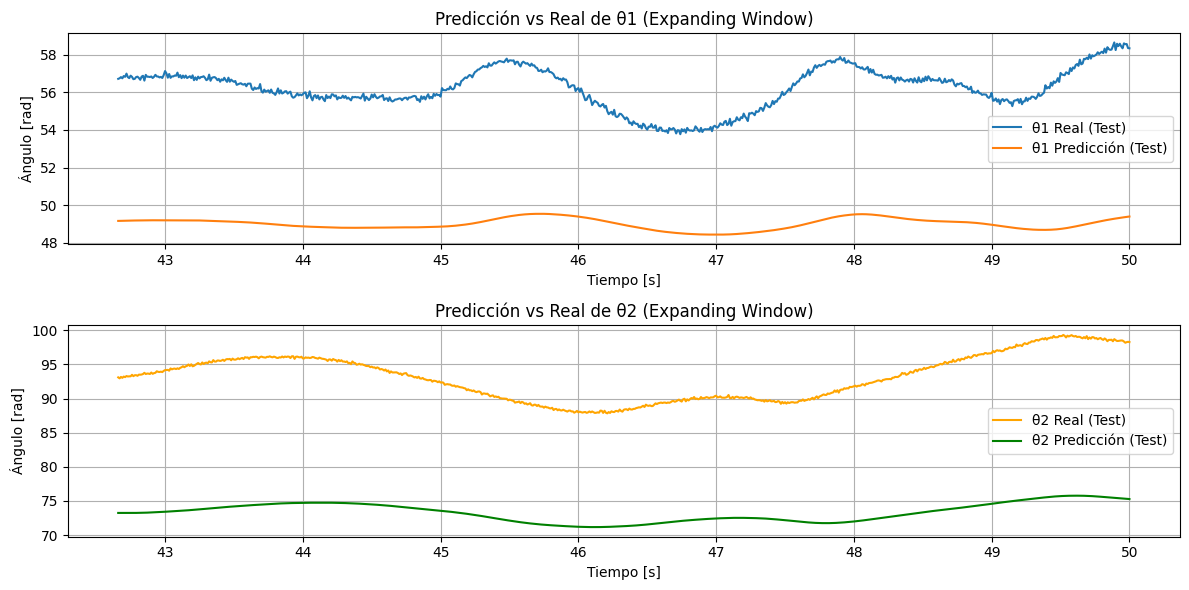

Métricas Globales en Test (Expanding Window):
MSE: 224.5070
MAE: 13.4989
R2: -39.8059


In [27]:
# Predicciones en Test con el mejor modelo (Expanding Window)
Y_pred_test_exp = best_model_expanding.predict(X_test)
Y_pred_test_exp_inv = scaler_y.inverse_transform(Y_pred_test_exp)
Y_test_inv = scaler_y.inverse_transform(Y_test)

# Eje de tiempo para test
test_index_start = (train_size + val_size) + window_size
t_test = t_eval[test_index_start:]

# Gráficas Predicción vs Real
plt.figure(figsize=(12,6))

# θ1
plt.subplot(2,1,1)
plt.plot(t_test, Y_test_inv[:,0], label='θ1 Real (Test)')
plt.plot(t_test, Y_pred_test_exp_inv[:,0], label='θ1 Predicción (Test)')
plt.title('Predicción vs Real de θ1 (Expanding Window)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.legend()
plt.grid(True)

# θ2
plt.subplot(2,1,2)
plt.plot(t_test, Y_test_inv[:,1], label='θ2 Real (Test)', color='orange')
plt.plot(t_test, Y_pred_test_exp_inv[:,1], label='θ2 Predicción (Test)', color='green')
plt.title('Predicción vs Real de θ2 (Expanding Window)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Métricas globales en test
mse_exp = mean_squared_error(Y_test_inv, Y_pred_test_exp_inv)
mae_exp = mean_absolute_error(Y_test_inv, Y_pred_test_exp_inv)
r2_exp_global = r2_score(Y_test_inv, Y_pred_test_exp_inv)

print("Métricas Globales en Test (Expanding Window):")
print(f"MSE: {mse_exp:.4f}")
print(f"MAE: {mae_exp:.4f}")
print(f"R2: {r2_exp_global:.4f}")

---

### Sin dropout

In [28]:
n_splits = 5

# TimeSeriesSplit con Expanding Window (sin max_train_size)
tscv_expanding = TimeSeriesSplit(n_splits=n_splits)

best_r2_expanding = -1e6
best_model_expanding = None
best_fold_expanding = None
fold_histories_expanding = []
fold_metrics_expanding = []

fold = 1
for train_index, val_index in tscv_expanding.split(X_train):
    print(f"Fold {fold} (Expanding)")
    X_train_exp, X_val_exp = X_train[train_index], X_train[val_index]
    Y_train_exp, Y_val_exp = Y_train[train_index], Y_train[val_index]

    # Definir modelo RNN (LSTM)
    model_exp = Sequential([
        LSTM(512, input_shape=(window_size, 2), return_sequences=True),
        LSTM(256, return_sequences=True),
        LSTM(128, return_sequences=True),
        LSTM(64, return_sequences=True),
        LSTM(32, return_sequences=False),
        Dense(2)
    ])

    model_exp.compile(loss='mean_squared_error', optimizer=Adam(1e-4), metrics=['r2_score'])

    # Entrenar
    history_exp = model_exp.fit(
        X_train_exp, Y_train_exp,
        epochs=100,
        batch_size=32,
        validation_data=(X_val_exp, Y_val_exp),
        shuffle=False,
        verbose=1
    )

    fold_histories_expanding.append(history_exp.history)

    loss_exp, r2_exp = model_exp.evaluate(X_val_exp, Y_val_exp, verbose=1)
    fold_metrics_expanding.append({'fold': fold, 'loss': loss_exp, 'r2': r2_exp})
    print(f"Fold {fold} (Expanding) - Loss: {loss_exp:.4f}, R2: {r2_exp:.4f}\n")

    if r2_exp > best_r2_expanding:
        best_r2_expanding = r2_exp
        best_model_expanding = model_exp
        best_fold_expanding = fold

    fold += 1

print(f"Mejor fold (Expanding Window): Fold {best_fold_expanding} con R2={best_r2_expanding:.4f}")

# Visualización del mejor fold
best_history_exp = fold_histories_expanding[best_fold_expanding - 1]

Fold 1 (Expanding)
Epoch 1/100


/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.3998 - r2_score: -179.0601 - val_loss: 0.0978 - val_r2_score: -3.4135
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.1686 - r2_score: -22.3159 - val_loss: 0.0430 - val_r2_score: -0.8504
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0697 - r2_score: -7.2837 - val_loss: 0.0084 - val_r2_score: 0.6719
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0210 - r2_score: 0.2743 - val_loss: 0.0115 - val_r2_score: 0.4793
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0652 - r2_score: -8.5133 - val_loss: 0.0044 - val_r2_score: 0.8075
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0189 - r2_score: -1.2360 - val_loss: 0.0041 - val_r2_score: 0.8303
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0105 - r2_score: -0.1684 - val_loss: 0.0045 - val_r2_score: 0.8020
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0082 - r2_score: -0.4649 - val_loss: 0.0036

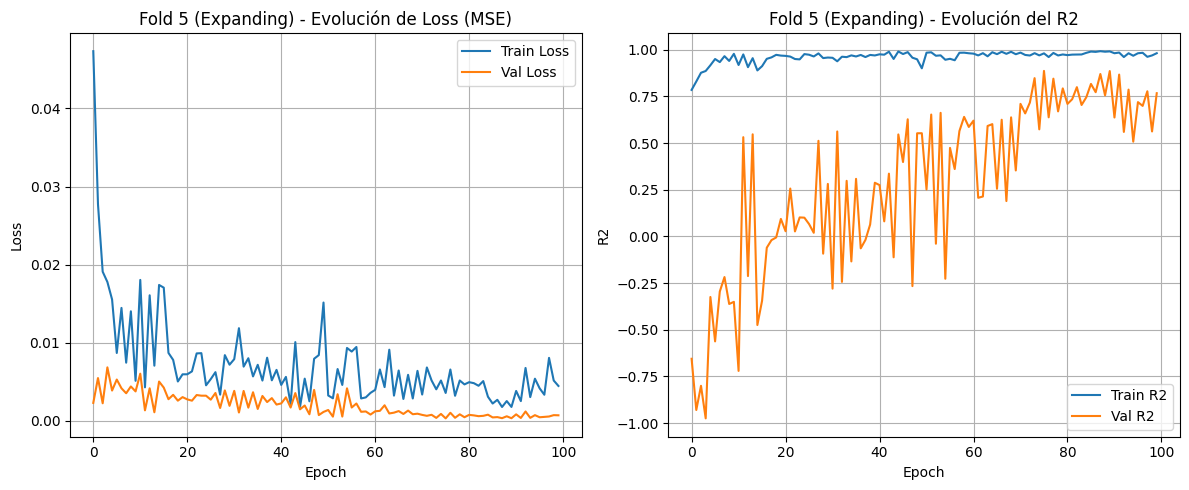

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(best_history_exp['loss'], label='Train Loss')
ax1.plot(best_history_exp['val_loss'], label='Val Loss')
ax1.set_title(f'Fold {best_fold_expanding} (Expanding) - Evolución de Loss (MSE)')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.legend()

ax2.plot(best_history_exp['r2_score'], label='Train R2')
ax2.plot(best_history_exp['val_r2_score'], label='Val R2')
ax2.set_title(f'Fold {best_fold_expanding} (Expanding) - Evolución del R2')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('R2')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


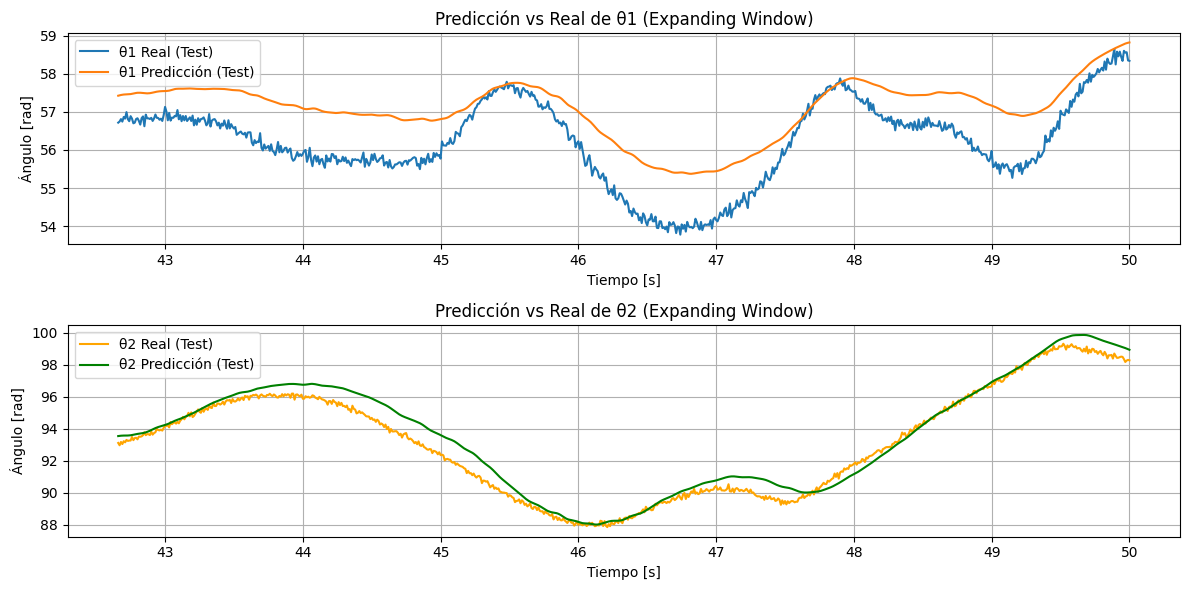

Métricas Globales en Test (Expanding Window):
MSE: 0.6975
MAE: 0.6984
R2: 0.5703


In [30]:
# Predicciones en Test con el mejor modelo (Expanding Window)
Y_pred_test_exp = best_model_expanding.predict(X_test)
Y_pred_test_exp_inv = scaler_y.inverse_transform(Y_pred_test_exp)
Y_test_inv = scaler_y.inverse_transform(Y_test)

# Eje de tiempo para test
test_index_start = (train_size + val_size) + window_size
t_test = t_eval[test_index_start:]

# Gráficas Predicción vs Real
plt.figure(figsize=(12,6))

# θ1
plt.subplot(2,1,1)
plt.plot(t_test, Y_test_inv[:,0], label='θ1 Real (Test)')
plt.plot(t_test, Y_pred_test_exp_inv[:,0], label='θ1 Predicción (Test)')
plt.title('Predicción vs Real de θ1 (Expanding Window)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.legend()
plt.grid(True)

# θ2
plt.subplot(2,1,2)
plt.plot(t_test, Y_test_inv[:,1], label='θ2 Real (Test)', color='orange')
plt.plot(t_test, Y_pred_test_exp_inv[:,1], label='θ2 Predicción (Test)', color='green')
plt.title('Predicción vs Real de θ2 (Expanding Window)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Métricas globales en test
mse_exp = mean_squared_error(Y_test_inv, Y_pred_test_exp_inv)
mae_exp = mean_absolute_error(Y_test_inv, Y_pred_test_exp_inv)
r2_exp_global = r2_score(Y_test_inv, Y_pred_test_exp_inv)

print("Métricas Globales en Test (Expanding Window):")
print(f"MSE: {mse_exp:.4f}")
print(f"MAE: {mae_exp:.4f}")
print(f"R2: {r2_exp_global:.4f}")

---

### units=50

In [31]:
n_splits = 5

# TimeSeriesSplit con Expanding Window (sin max_train_size)
tscv_expanding = TimeSeriesSplit(n_splits=n_splits)

best_r2_expanding = -1e6
best_model_expanding = None
best_fold_expanding = None
fold_histories_expanding = []
fold_metrics_expanding = []

fold = 1
for train_index, val_index in tscv_expanding.split(X_train):
    print(f"Fold {fold} (Expanding)")
    X_train_exp, X_val_exp = X_train[train_index], X_train[val_index]
    Y_train_exp, Y_val_exp = Y_train[train_index], Y_train[val_index]

    # Definir modelo RNN (LSTM)
    model_exp = Sequential([
        LSTM(50, input_shape=(window_size, 2), return_sequences=True),
        LSTM(50, return_sequences=True),
        LSTM(50, return_sequences=True),
        LSTM(50, return_sequences=True),
        LSTM(50, return_sequences=False),
        Dense(2)
    ])

    model_exp.compile(loss='mean_squared_error', optimizer=Adam(1e-4), metrics=['r2_score'])

    # Entrenar
    history_exp = model_exp.fit(
        X_train_exp, Y_train_exp,
        epochs=100,
        batch_size=32,
        validation_data=(X_val_exp, Y_val_exp),
        shuffle=False,
        verbose=1
    )

    fold_histories_expanding.append(history_exp.history)

    loss_exp, r2_exp = model_exp.evaluate(X_val_exp, Y_val_exp, verbose=1)
    fold_metrics_expanding.append({'fold': fold, 'loss': loss_exp, 'r2': r2_exp})
    print(f"Fold {fold} (Expanding) - Loss: {loss_exp:.4f}, R2: {r2_exp:.4f}\n")

    if r2_exp > best_r2_expanding:
        best_r2_expanding = r2_exp
        best_model_expanding = model_exp
        best_fold_expanding = fold

    fold += 1

print(f"Mejor fold (Expanding Window): Fold {best_fold_expanding} con R2={best_r2_expanding:.4f}")

# Visualización del mejor fold
best_history_exp = fold_histories_expanding[best_fold_expanding - 1]

Fold 1 (Expanding)
Epoch 1/100


/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 0.4768 - r2_score: -193.2791 - val_loss: 0.1425 - val_r2_score: -5.3861
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.3141 - r2_score: -112.5821 - val_loss: 0.1173 - val_r2_score: -4.3755
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1627 - r2_score: -26.3751 - val_loss: 0.1215 - val_r2_score: -4.4097
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1226 - r2_score: -13.9109 - val_loss: 0.0990 - val_r2_score: -3.4725
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0720 - r2_score: -8.1538 - val_loss: 0.0637 - val_r2_score: -1.8800
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0353 - r2_score: -3.0291 - val_loss: 0.0352 - val_r2_score: -0.5868
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0076 - r2_score: -2.6560 - val_loss: 0.0312 - val_r2_score: -0.4294
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0061 - r2_score: -0.8317 - val_los

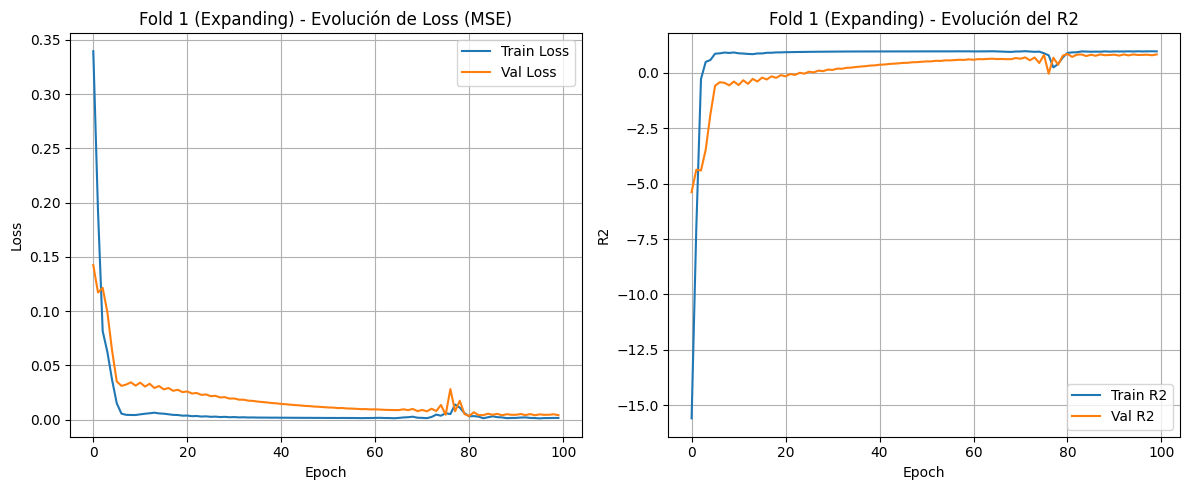

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(best_history_exp['loss'], label='Train Loss')
ax1.plot(best_history_exp['val_loss'], label='Val Loss')
ax1.set_title(f'Fold {best_fold_expanding} (Expanding) - Evolución de Loss (MSE)')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.legend()

ax2.plot(best_history_exp['r2_score'], label='Train R2')
ax2.plot(best_history_exp['val_r2_score'], label='Val R2')
ax2.set_title(f'Fold {best_fold_expanding} (Expanding) - Evolución del R2')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('R2')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


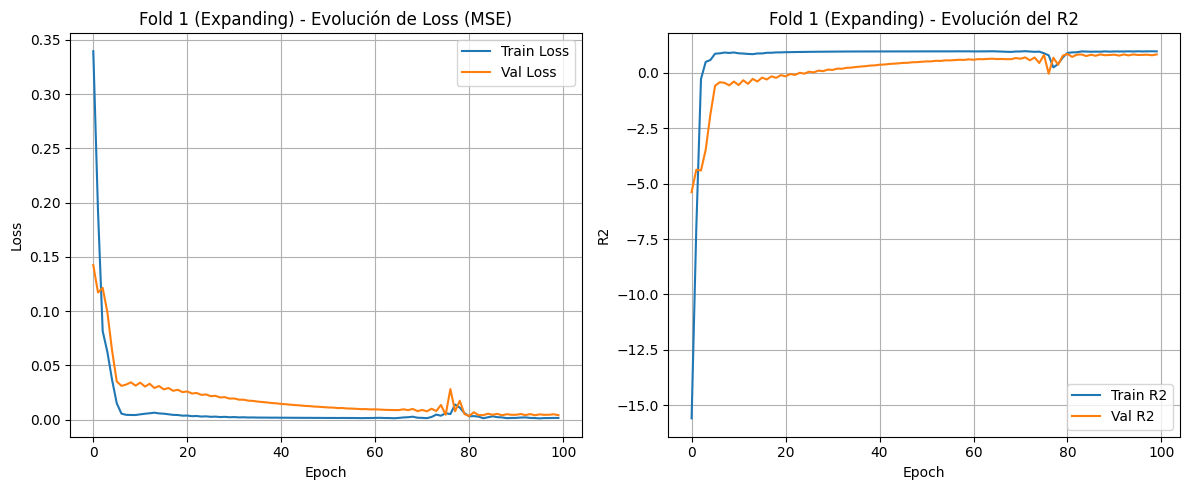

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(best_history_exp['loss'], label='Train Loss')
ax1.plot(best_history_exp['val_loss'], label='Val Loss')
ax1.set_title(f'Fold {best_fold_expanding} (Expanding) - Evolución de Loss (MSE)')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.legend()

ax2.plot(best_history_exp['r2_score'], label='Train R2')
ax2.plot(best_history_exp['val_r2_score'], label='Val R2')
ax2.set_title(f'Fold {best_fold_expanding} (Expanding) - Evolución del R2')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('R2')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


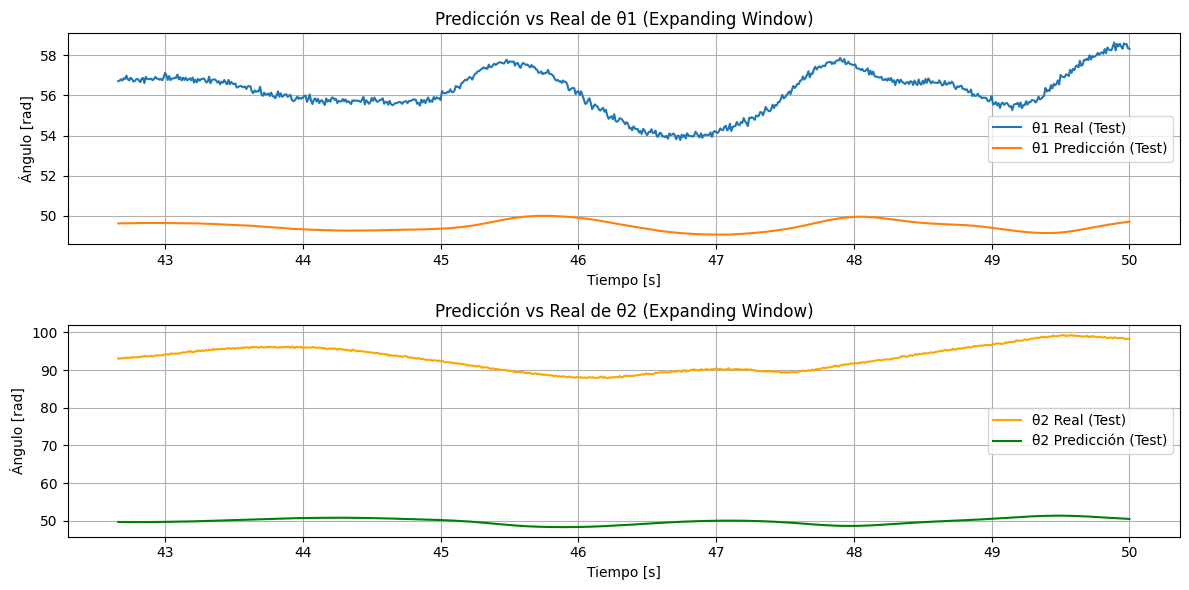

Métricas Globales en Test (Expanding Window):
MSE: 963.6727
MAE: 25.0072
R2: -104.6537


In [34]:
# Predicciones en Test con el mejor modelo (Expanding Window)
Y_pred_test_exp = best_model_expanding.predict(X_test)
Y_pred_test_exp_inv = scaler_y.inverse_transform(Y_pred_test_exp)
Y_test_inv = scaler_y.inverse_transform(Y_test)

# Eje de tiempo para test
test_index_start = (train_size + val_size) + window_size
t_test = t_eval[test_index_start:]

# Gráficas Predicción vs Real
plt.figure(figsize=(12,6))

# θ1
plt.subplot(2,1,1)
plt.plot(t_test, Y_test_inv[:,0], label='θ1 Real (Test)')
plt.plot(t_test, Y_pred_test_exp_inv[:,0], label='θ1 Predicción (Test)')
plt.title('Predicción vs Real de θ1 (Expanding Window)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.legend()
plt.grid(True)

# θ2
plt.subplot(2,1,2)
plt.plot(t_test, Y_test_inv[:,1], label='θ2 Real (Test)', color='orange')
plt.plot(t_test, Y_pred_test_exp_inv[:,1], label='θ2 Predicción (Test)', color='green')
plt.title('Predicción vs Real de θ2 (Expanding Window)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Métricas globales en test
mse_exp = mean_squared_error(Y_test_inv, Y_pred_test_exp_inv)
mae_exp = mean_absolute_error(Y_test_inv, Y_pred_test_exp_inv)
r2_exp_global = r2_score(Y_test_inv, Y_pred_test_exp_inv)

print("Métricas Globales en Test (Expanding Window):")
print(f"MSE: {mse_exp:.4f}")
print(f"MAE: {mae_exp:.4f}")
print(f"R2: {r2_exp_global:.4f}")

---

## mish

### benchmark mish

In [35]:
import tensorflow as tf

def mish(x):
    return x * tf.math.tanh(tf.math.softplus(x))


In [36]:
n_splits = 5

# TimeSeriesSplit con Expanding Window (sin max_train_size)
tscv_expanding = TimeSeriesSplit(n_splits=n_splits)

best_r2_expanding = -1e6
best_model_expanding = None
best_fold_expanding = None
fold_histories_expanding = []
fold_metrics_expanding = []

fold = 1
for train_index, val_index in tscv_expanding.split(X_train):
    print(f"Fold {fold} (Expanding)")
    X_train_exp, X_val_exp = X_train[train_index], X_train[val_index]
    Y_train_exp, Y_val_exp = Y_train[train_index], Y_train[val_index]

    # Definir modelo RNN (LSTM)
    model_exp = Sequential([
        LSTM(512, activation=mish, input_shape=(window_size, 2), return_sequences=True),
        LSTM(254, activation=mish, return_sequences=True),
        LSTM(128, activation=mish, return_sequences=True),
        LSTM(64, activation=mish, return_sequences=True),
        LSTM(32, activation=mish, return_sequences=False),
        Dense(2)
    ])

    model_exp.compile(loss='mean_squared_error', optimizer=Adam(1e-4), metrics=['r2_score'])

    # Entrenar
    history_exp = model_exp.fit(
        X_train_exp, Y_train_exp,
        epochs=100,
        batch_size=32,
        validation_data=(X_val_exp, Y_val_exp),
        shuffle=False,
        verbose=1
    )

    fold_histories_expanding.append(history_exp.history)

    loss_exp, r2_exp = model_exp.evaluate(X_val_exp, Y_val_exp, verbose=1)
    fold_metrics_expanding.append({'fold': fold, 'loss': loss_exp, 'r2': r2_exp})
    print(f"Fold {fold} (Expanding) - Loss: {loss_exp:.4f}, R2: {r2_exp:.4f}\n")

    if r2_exp > best_r2_expanding:
        best_r2_expanding = r2_exp
        best_model_expanding = model_exp
        best_fold_expanding = fold

    fold += 1

print(f"Mejor fold (Expanding Window): Fold {best_fold_expanding} con R2={best_r2_expanding:.4f}")

# Visualización del mejor fold
best_history_exp = fold_histories_expanding[best_fold_expanding - 1]

Fold 1 (Expanding)
Epoch 1/100


/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-03-23 12:50:32.692667: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_142', 8 bytes spill stores, 8 bytes spill loads

2025-03-23 12:50:33.032294: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_154', 8 bytes spill stores, 8 bytes spill loads



17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.5565 - r2_score: -231.0854

2025-03-23 12:50:37.333956: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_154', 8 bytes spill stores, 8 bytes spill loads

2025-03-23 12:50:37.535367: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_142', 8 bytes spill stores, 8 bytes spill loads



18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 345ms/step - loss: 0.5416 - r2_score: -208.8586 - val_loss: 0.1756 - val_r2_score: -6.6941
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.5318 - r2_score: -204.3452 - val_loss: 0.1732 - val_r2_score: -6.6150
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.5112 - r2_score: -196.0626 - val_loss: 0.1633 - val_r2_score: -6.2896
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.7762 - r2_score: -172.7342 - val_loss: 0.1601 - val_r2_score: -6.1701
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.4115 - r2_score: -142.7269 - val_loss: 0.1600 - val_r2_score: -6.1606
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.4132 - r2_score: -145.5808 - val_loss: 0.1583 - val_r2_score: -6.1055
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.3986 - r2_score: -138.6085 - val_loss: 0.1565 - val_r2_score: -6.0430
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.3796 - r2_score: -129.26

2025-03-23 12:53:18.325404: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_142', 8 bytes spill stores, 8 bytes spill loads

2025-03-23 12:53:18.809829: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_154', 8 bytes spill stores, 8 bytes spill loads



36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 198ms/step - loss: 0.4361 - r2_score: -109.0581 - val_loss: 0.2250 - val_r2_score: -37.2234
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.4138 - r2_score: -103.9885 - val_loss: 0.2261 - val_r2_score: -35.7930
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.2380 - r2_score: -35.8629 - val_loss: 0.2310 - val_r2_score: -36.3974
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.2270 - r2_score: -47.9698 - val_loss: 0.2377 - val_r2_score: -36.5949
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.1964 - r2_score: -33.0703 - val_loss: 0.2359 - val_r2_score: -36.3147
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.1865 - r2_score: -26.1541 - val_loss: 0.2294 - val_r2_score: -35.7448
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.1785 - r2_score: -21.1668 - val_loss: 0.2236 - val_r2_score: -35.2177
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.1668 - r2_score: -15.2

2025-03-23 12:57:37.754842: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_142', 8 bytes spill stores, 8 bytes spill loads

2025-03-23 12:57:37.904769: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_154', 8 bytes spill stores, 8 bytes spill loads



54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 149ms/step - loss: 0.3837 - r2_score: -73.5737 - val_loss: 0.3936 - val_r2_score: -60.3400
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.3677 - r2_score: -70.5574 - val_loss: 0.3698 - val_r2_score: -56.9653
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 20.0238 - r2_score: -6309.6797 - val_loss: 0.3687 - val_r2_score: -58.0601
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.3245 - r2_score: -61.8199 - val_loss: 0.3689 - val_r2_score: -58.4301
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.3203 - r2_score: -60.7978 - val_loss: 0.3691 - val_r2_score: -58.8329
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.3159 - r2_score: -59.6757 - val_loss: 0.3693 - val_r2_score: -59.2692
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.3113 - r2_score: -58.4997 - val_loss: 0.3696 - val_r2_score: -59.7377
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.3068 - r2_score: -57.

### mish

    model_exp = Sequential([
        LSTM(128, activation=mish, input_shape=(window_size, 2), return_sequences=True),
        LSTM(64, activation=mish, return_sequences=True),
        LSTM(32, activation=mish, return_sequences=False),
        Dense(64, activation=mish),  # Capa densa intermedia
        Dense(2)
    ])

In [37]:

# Definir función mish manualmente
def mish(x):
    return x * tf.math.tanh(tf.math.softplus(x))

n_splits = 5
tscv_expanding = TimeSeriesSplit(n_splits=n_splits)

best_r2_expanding = -1e6
best_model_expanding = None
best_fold_expanding = None
fold_histories_expanding = []
fold_metrics_expanding = []

fold = 1
for train_index, val_index in tscv_expanding.split(X_train):
    print(f"Fold {fold} (Expanding)")
    X_train_exp, X_val_exp = X_train[train_index], X_train[val_index]
    Y_train_exp, Y_val_exp = Y_train[train_index], Y_train[val_index]

    # Modelo ajustado: 3 LSTM + Dense intermedia con mish
    model_exp = Sequential([
        LSTM(128, activation=mish, input_shape=(window_size, 2), return_sequences=True),
        LSTM(64, activation=mish, return_sequences=True),
        LSTM(32, activation=mish, return_sequences=False),
        Dense(64, activation=mish),  # Capa densa intermedia
        Dense(2)
    ])

    model_exp.compile(loss='mean_squared_error', optimizer=Adam(1e-4), metrics=['r2_score'])

    # Entrenar
    history_exp = model_exp.fit(
        X_train_exp, Y_train_exp,
        epochs=100,
        batch_size=32,
        validation_data=(X_val_exp, Y_val_exp),
        shuffle=False,
        verbose=1
    )

    fold_histories_expanding.append(history_exp.history)

    loss_exp, r2_exp = model_exp.evaluate(X_val_exp, Y_val_exp, verbose=1)
    fold_metrics_expanding.append({'fold': fold, 'loss': loss_exp, 'r2': r2_exp})
    print(f"Fold {fold} (Expanding) - Loss: {loss_exp:.4f}, R2: {r2_exp:.4f}\n")

    if r2_exp > best_r2_expanding:
        best_r2_expanding = r2_exp
        best_model_expanding = model_exp
        best_fold_expanding = fold

    fold += 1

print(f"Mejor fold (Expanding Window): Fold {best_fold_expanding} con R2={best_r2_expanding:.4f}")

# Historial del mejor fold
best_history_exp = fold_histories_expanding[best_fold_expanding - 1]

Fold 1 (Expanding)
Epoch 1/100


2025-03-23 13:20:39.118543: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_90', 8 bytes spill stores, 8 bytes spill loads



15/18 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.5705 - r2_score: -257.7361

2025-03-23 13:20:41.667903: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_90', 8 bytes spill stores, 8 bytes spill loads



18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 213ms/step - loss: 0.5388 - r2_score: -208.3407 - val_loss: 0.1733 - val_r2_score: -6.6058
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.5209 - r2_score: -199.4522 - val_loss: 0.1690 - val_r2_score: -6.4520
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.5019 - r2_score: -189.6770 - val_loss: 0.1648 - val_r2_score: -6.2990
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.4774 - r2_score: -177.5857 - val_loss: 0.1602 - val_r2_score: -6.1395
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.4403 - r2_score: -160.2569 - val_loss: 0.1548 - val_r2_score: -5.9610
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.3652 - r2_score: -128.3347 - val_loss: 0.1494 - val_r2_score: -5.8037
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2021 - r2_score: -48.1581 - val_loss: 0.1504 - val_r2_score: -5.8460
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2254 - r2_score: -56.3293 

2025-03-23 13:22:03.599991: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_90', 8 bytes spill stores, 8 bytes spill loads



36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 0.4346 - r2_score: -108.9586 - val_loss: 0.2269 - val_r2_score: -37.4275
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.4144 - r2_score: -102.4651 - val_loss: 0.2271 - val_r2_score: -36.8802
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.3902 - r2_score: -95.1625 - val_loss: 0.2296 - val_r2_score: -36.4383
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.3404 - r2_score: -82.2653 - val_loss: 0.2425 - val_r2_score: -36.3141
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.3887 - r2_score: -54.7826 - val_loss: 0.2323 - val_r2_score: -35.5961
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2778 - r2_score: -60.2990 - val_loss: 0.2347 - val_r2_score: -35.5412
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2686 - r2_score: -57.0266 - val_loss: 0.2380 - val_r2_score: -35.5571
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2581 - r2_score: -52.97

2025-03-23 13:24:06.724125: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_90', 8 bytes spill stores, 8 bytes spill loads



54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 0.3822 - r2_score: -73.4337 - val_loss: 0.3922 - val_r2_score: -60.3949
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3668 - r2_score: -69.8998 - val_loss: 0.3730 - val_r2_score: -58.6205
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3441 - r2_score: -65.7852 - val_loss: 0.3179 - val_r2_score: -53.3240
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2807 - r2_score: -56.9832 - val_loss: 0.1658 - val_r2_score: -30.9047
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1733 - r2_score: -37.1314 - val_loss: 0.0643 - val_r2_score: -11.0415
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 9455890432.0000 - r2_score: -5968892002304.0000 - val_loss: 0.0792 - val_r2_score: -13.1959
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0998 - r2_score: -18.3945 - val_loss: 0.0785 - val_r2_score: -12.9204
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0988 -

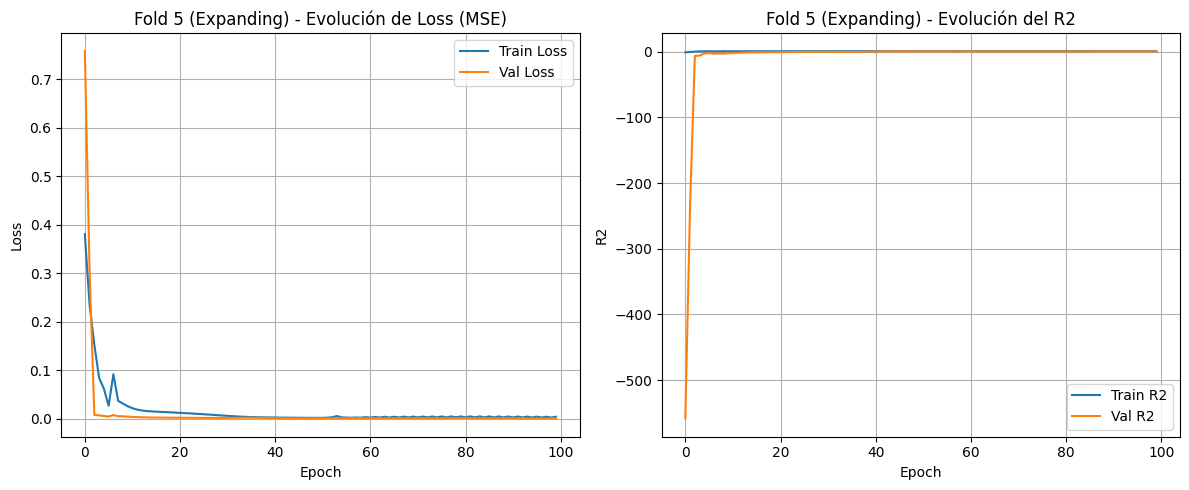

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(best_history_exp['loss'], label='Train Loss')
ax1.plot(best_history_exp['val_loss'], label='Val Loss')
ax1.set_title(f'Fold {best_fold_expanding} (Expanding) - Evolución de Loss (MSE)')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.legend()

ax2.plot(best_history_exp['r2_score'], label='Train R2')
ax2.plot(best_history_exp['val_r2_score'], label='Val R2')
ax2.set_title(f'Fold {best_fold_expanding} (Expanding) - Evolución del R2')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('R2')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


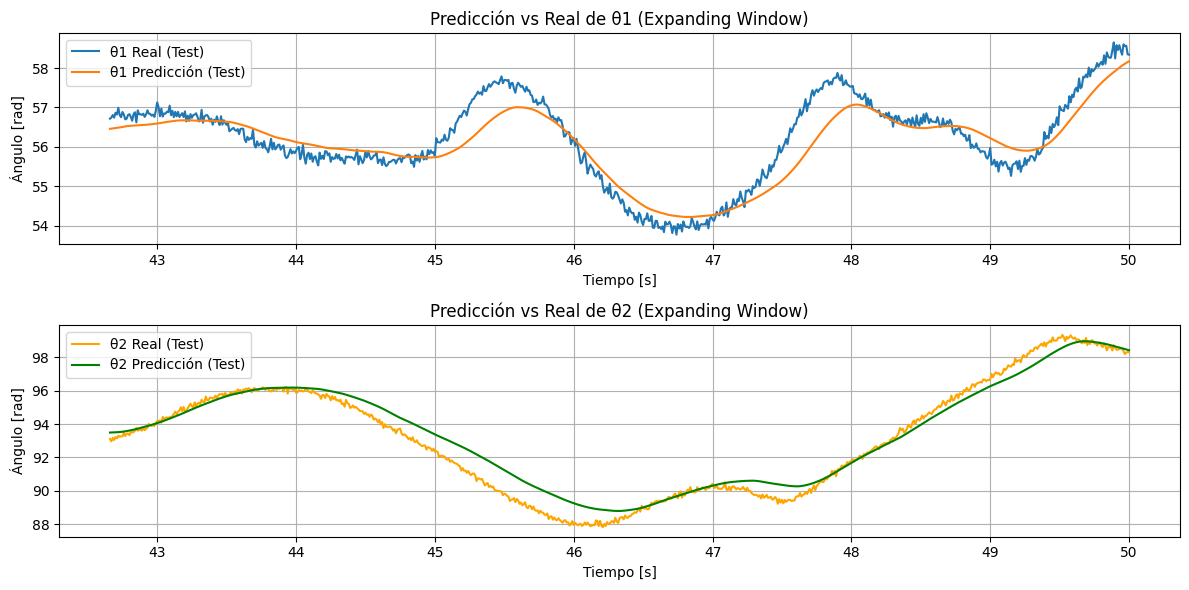

Métricas Globales en Test (Expanding Window):
MSE: 0.3374
MAE: 0.4374
R2: 0.8910


In [39]:
# Predicciones en Test con el mejor modelo (Expanding Window)
Y_pred_test_exp = best_model_expanding.predict(X_test)
Y_pred_test_exp_inv = scaler_y.inverse_transform(Y_pred_test_exp)
Y_test_inv = scaler_y.inverse_transform(Y_test)

# Eje de tiempo para test
test_index_start = (train_size + val_size) + window_size
t_test = t_eval[test_index_start:]

# Gráficas Predicción vs Real
plt.figure(figsize=(12,6))

# θ1
plt.subplot(2,1,1)
plt.plot(t_test, Y_test_inv[:,0], label='θ1 Real (Test)')
plt.plot(t_test, Y_pred_test_exp_inv[:,0], label='θ1 Predicción (Test)')
plt.title('Predicción vs Real de θ1 (Expanding Window)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.legend()
plt.grid(True)

# θ2
plt.subplot(2,1,2)
plt.plot(t_test, Y_test_inv[:,1], label='θ2 Real (Test)', color='orange')
plt.plot(t_test, Y_pred_test_exp_inv[:,1], label='θ2 Predicción (Test)', color='green')
plt.title('Predicción vs Real de θ2 (Expanding Window)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Métricas globales en test
mse_exp = mean_squared_error(Y_test_inv, Y_pred_test_exp_inv)
mae_exp = mean_absolute_error(Y_test_inv, Y_pred_test_exp_inv)
r2_exp_global = r2_score(Y_test_inv, Y_pred_test_exp_inv)

print("Métricas Globales en Test (Expanding Window):")
print(f"MSE: {mse_exp:.4f}")
print(f"MAE: {mae_exp:.4f}")
print(f"R2: {r2_exp_global:.4f}")

---

### size_window = 50, units= 50


In [40]:

# Definir función mish manualmente
def mish(x):
    return x * tf.math.tanh(tf.math.softplus(x))

n_splits = 5
tscv_expanding = TimeSeriesSplit(n_splits=n_splits)

best_r2_expanding = -1e6
best_model_expanding = None
best_fold_expanding = None
fold_histories_expanding = []
fold_metrics_expanding = []

fold = 1
for train_index, val_index in tscv_expanding.split(X_train):
    print(f"Fold {fold} (Expanding)")
    X_train_exp, X_val_exp = X_train[train_index], X_train[val_index]
    Y_train_exp, Y_val_exp = Y_train[train_index], Y_train[val_index]

    # Modelo ajustado: 3 LSTM + Dense intermedia con mish
    model_exp = Sequential([
        LSTM(50, activation=mish, input_shape=(window_size, 2), return_sequences=True),
        LSTM(50, activation=mish, return_sequences=True),
        LSTM(50, activation=mish, return_sequences=False),
        Dense(50, activation=mish),  # Capa densa intermedia
        Dense(2)
    ])

    model_exp.compile(loss='mean_squared_error', optimizer=Adam(1e-4), metrics=['r2_score'])

    # Entrenar
    history_exp = model_exp.fit(
        X_train_exp, Y_train_exp,
        epochs=100,
        batch_size=32,
        validation_data=(X_val_exp, Y_val_exp),
        shuffle=False,
        verbose=1
    )

    fold_histories_expanding.append(history_exp.history)

    loss_exp, r2_exp = model_exp.evaluate(X_val_exp, Y_val_exp, verbose=1)
    fold_metrics_expanding.append({'fold': fold, 'loss': loss_exp, 'r2': r2_exp})
    print(f"Fold {fold} (Expanding) - Loss: {loss_exp:.4f}, R2: {r2_exp:.4f}\n")

    if r2_exp > best_r2_expanding:
        best_r2_expanding = r2_exp
        best_model_expanding = model_exp
        best_fold_expanding = fold

    fold += 1

print(f"Mejor fold (Expanding Window): Fold {best_fold_expanding} con R2={best_r2_expanding:.4f}")

# Historial del mejor fold
best_history_exp = fold_histories_expanding[best_fold_expanding - 1]

Fold 1 (Expanding)
Epoch 1/100


/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - loss: 0.5399 - r2_score: -208.7009 - val_loss: 0.1745 - val_r2_score: -6.6574
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.5263 - r2_score: -202.0069 - val_loss: 0.1715 - val_r2_score: -6.5533
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.5124 - r2_score: -194.8662 - val_loss: 0.1685 - val_r2_score: -6.4454
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.4961 - r2_score: -186.5984 - val_loss: 0.1652 - val_r2_score: -6.3332
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.4754 - r2_score: -176.3668 - val_loss: 0.1617 - val_r2_score: -6.2144
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.4472 - r2_score: -162.7130 - val_loss: 0.1579 - val_r2_score: -6.0915
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.4047 - r2_score: -142.7500 - val_loss: 0.1547 - val_r2_score: -5.9923
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.3334 - r2_score: -110.407

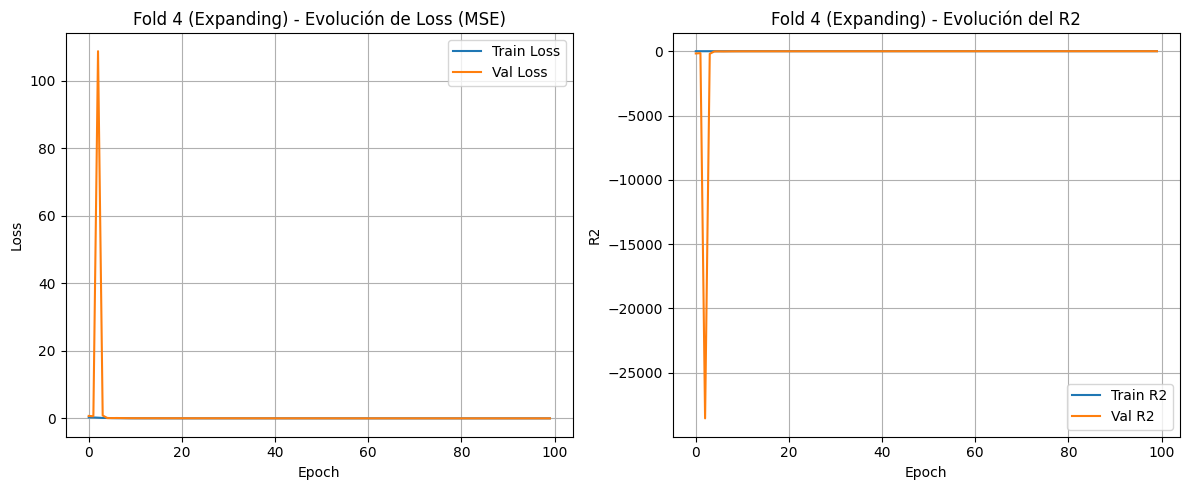

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


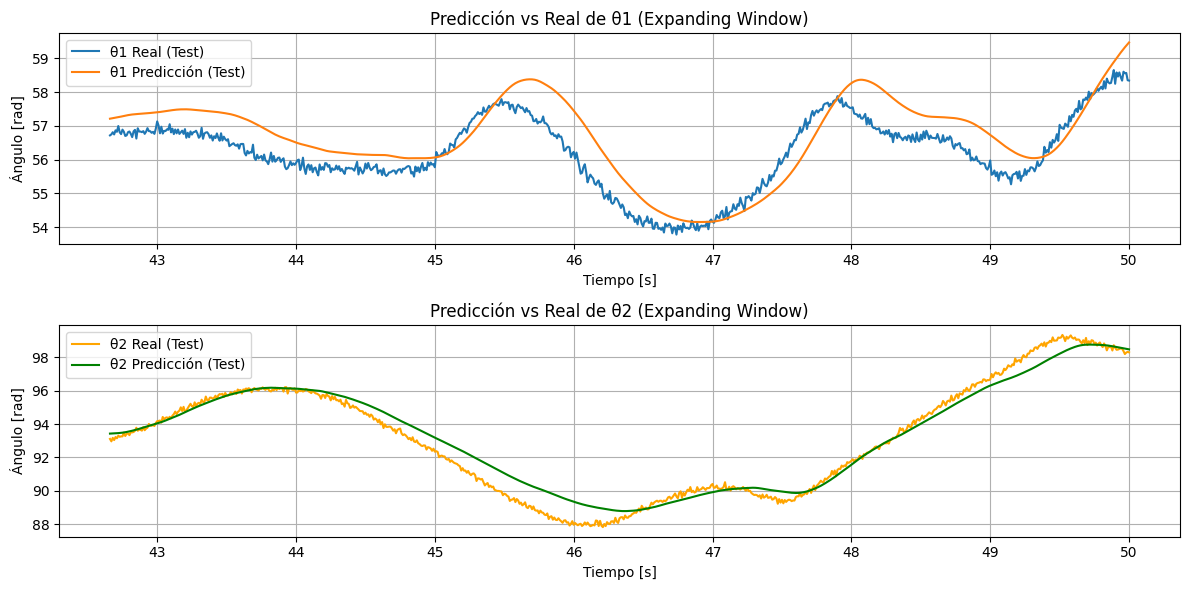

Métricas Globales en Test (Expanding Window):
MSE: 0.4479
MAE: 0.5449
R2: 0.7679


In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(best_history_exp['loss'], label='Train Loss')
ax1.plot(best_history_exp['val_loss'], label='Val Loss')
ax1.set_title(f'Fold {best_fold_expanding} (Expanding) - Evolución de Loss (MSE)')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.legend()

ax2.plot(best_history_exp['r2_score'], label='Train R2')
ax2.plot(best_history_exp['val_r2_score'], label='Val R2')
ax2.set_title(f'Fold {best_fold_expanding} (Expanding) - Evolución del R2')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('R2')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

# Predicciones en Test con el mejor modelo (Expanding Window)
Y_pred_test_exp = best_model_expanding.predict(X_test)
Y_pred_test_exp_inv = scaler_y.inverse_transform(Y_pred_test_exp)
Y_test_inv = scaler_y.inverse_transform(Y_test)

# Eje de tiempo para test
test_index_start = (train_size + val_size) + window_size
t_test = t_eval[test_index_start:]

# Gráficas Predicción vs Real
plt.figure(figsize=(12,6))

# θ1
plt.subplot(2,1,1)
plt.plot(t_test, Y_test_inv[:,0], label='θ1 Real (Test)')
plt.plot(t_test, Y_pred_test_exp_inv[:,0], label='θ1 Predicción (Test)')
plt.title('Predicción vs Real de θ1 (Expanding Window)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.legend()
plt.grid(True)

# θ2
plt.subplot(2,1,2)
plt.plot(t_test, Y_test_inv[:,1], label='θ2 Real (Test)', color='orange')
plt.plot(t_test, Y_pred_test_exp_inv[:,1], label='θ2 Predicción (Test)', color='green')
plt.title('Predicción vs Real de θ2 (Expanding Window)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Métricas globales en test
mse_exp = mean_squared_error(Y_test_inv, Y_pred_test_exp_inv)
mae_exp = mean_absolute_error(Y_test_inv, Y_pred_test_exp_inv)
r2_exp_global = r2_score(Y_test_inv, Y_pred_test_exp_inv)

print("Métricas Globales en Test (Expanding Window):")
print(f"MSE: {mse_exp:.4f}")
print(f"MAE: {mae_exp:.4f}")
print(f"R2: {r2_exp_global:.4f}")

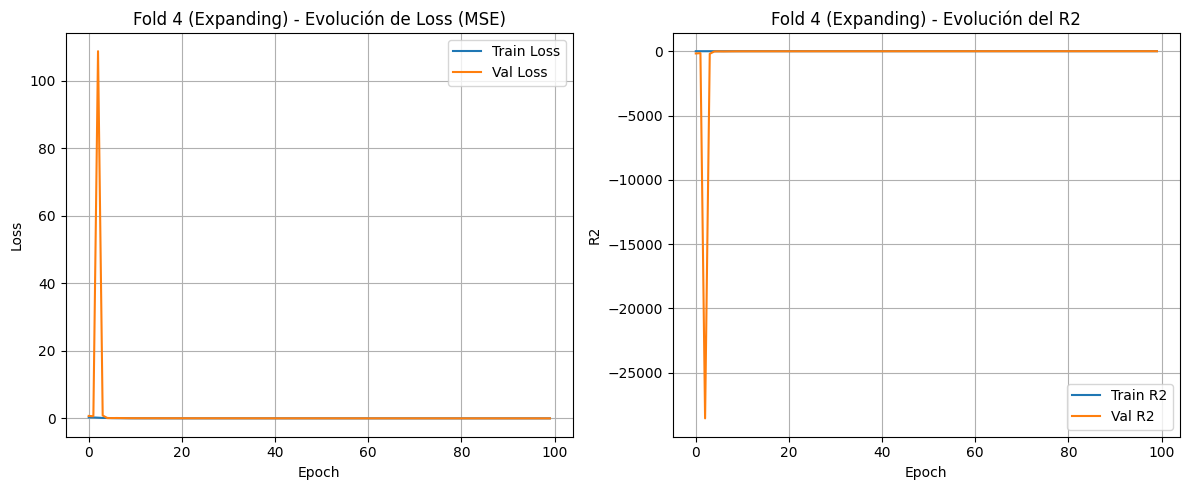

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


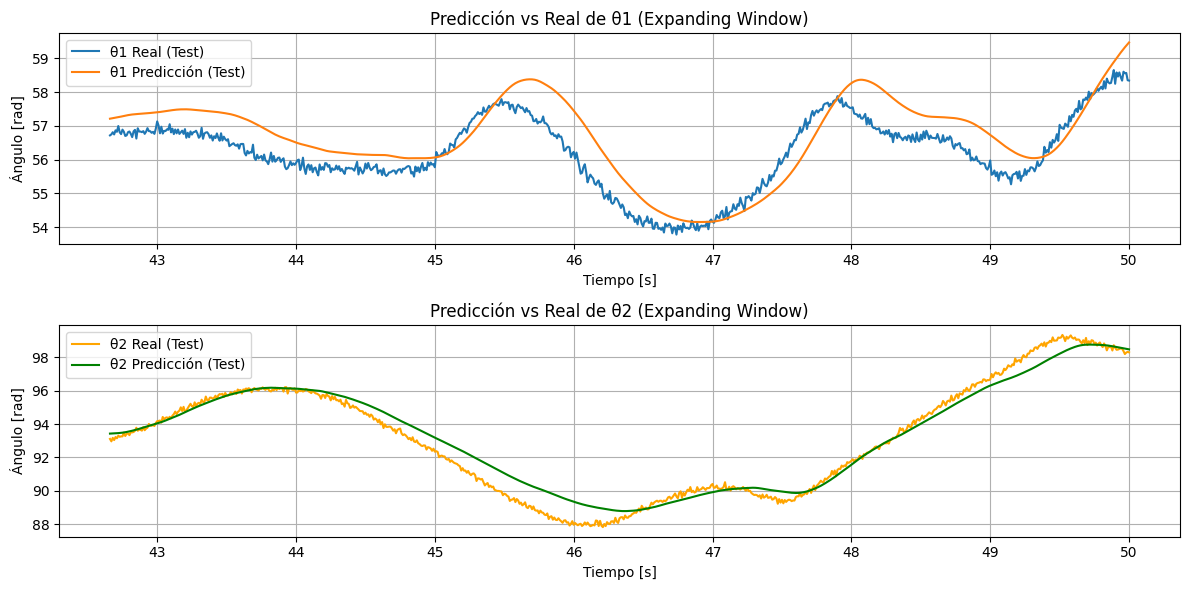

Métricas Globales en Test (Expanding Window):
MSE: 0.4479
MAE: 0.5449
R2: 0.7679


In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(best_history_exp['loss'], label='Train Loss')
ax1.plot(best_history_exp['val_loss'], label='Val Loss')
ax1.set_title(f'Fold {best_fold_expanding} (Expanding) - Evolución de Loss (MSE)')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.legend()

ax2.plot(best_history_exp['r2_score'], label='Train R2')
ax2.plot(best_history_exp['val_r2_score'], label='Val R2')
ax2.set_title(f'Fold {best_fold_expanding} (Expanding) - Evolución del R2')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('R2')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

# Predicciones en Test con el mejor modelo (Expanding Window)
Y_pred_test_exp = best_model_expanding.predict(X_test)
Y_pred_test_exp_inv = scaler_y.inverse_transform(Y_pred_test_exp)
Y_test_inv = scaler_y.inverse_transform(Y_test)

# Eje de tiempo para test
test_index_start = (train_size + val_size) + window_size
t_test = t_eval[test_index_start:]

# Gráficas Predicción vs Real
plt.figure(figsize=(12,6))

# θ1
plt.subplot(2,1,1)
plt.plot(t_test, Y_test_inv[:,0], label='θ1 Real (Test)')
plt.plot(t_test, Y_pred_test_exp_inv[:,0], label='θ1 Predicción (Test)')
plt.title('Predicción vs Real de θ1 (Expanding Window)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.legend()
plt.grid(True)

# θ2
plt.subplot(2,1,2)
plt.plot(t_test, Y_test_inv[:,1], label='θ2 Real (Test)', color='orange')
plt.plot(t_test, Y_pred_test_exp_inv[:,1], label='θ2 Predicción (Test)', color='green')
plt.title('Predicción vs Real de θ2 (Expanding Window)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Métricas globales en test
mse_exp = mean_squared_error(Y_test_inv, Y_pred_test_exp_inv)
mae_exp = mean_absolute_error(Y_test_inv, Y_pred_test_exp_inv)
r2_exp_global = r2_score(Y_test_inv, Y_pred_test_exp_inv)

print("Métricas Globales en Test (Expanding Window):")
print(f"MSE: {mse_exp:.4f}")
print(f"MAE: {mae_exp:.4f}")
print(f"R2: {r2_exp_global:.4f}")

## swish

In [43]:
from tensorflow.keras.activations import swish

In [44]:
n_splits = 5

# TimeSeriesSplit con Expanding Window (sin max_train_size)
tscv_expanding = TimeSeriesSplit(n_splits=n_splits)

best_r2_expanding = -1e6
best_model_expanding = None
best_fold_expanding = None
fold_histories_expanding = []
fold_metrics_expanding = []

fold = 1
for train_index, val_index in tscv_expanding.split(X_train):
    print(f"Fold {fold} (Expanding)")
    X_train_exp, X_val_exp = X_train[train_index], X_train[val_index]
    Y_train_exp, Y_val_exp = Y_train[train_index], Y_train[val_index]

    # Definir modelo RNN (LSTM)
    model_exp = Sequential([
        LSTM(50, activation=swish, input_shape=(window_size, 2), return_sequences=True),
        LSTM(50, activation=swish, return_sequences=True),
        LSTM(50, activation=swish, return_sequences=True),
        LSTM(50, activation=swish, return_sequences=True),
        LSTM(50, activation=swish, return_sequences=False),
        Dense(2)
    ])

    model_exp.compile(loss='mean_squared_error', optimizer=Adam(1e-4), metrics=['r2_score'])

    # Entrenar
    history_exp = model_exp.fit(
        X_train_exp, Y_train_exp,
        epochs=100,
        batch_size=32,
        validation_data=(X_val_exp, Y_val_exp),
        shuffle=False,
        verbose=1
    )

    fold_histories_expanding.append(history_exp.history)

    loss_exp, r2_exp = model_exp.evaluate(X_val_exp, Y_val_exp, verbose=1)
    fold_metrics_expanding.append({'fold': fold, 'loss': loss_exp, 'r2': r2_exp})
    print(f"Fold {fold} (Expanding) - Loss: {loss_exp:.4f}, R2: {r2_exp:.4f}\n")

    if r2_exp > best_r2_expanding:
        best_r2_expanding = r2_exp
        best_model_expanding = model_exp
        best_fold_expanding = fold

    fold += 1

print(f"Mejor fold (Expanding Window): Fold {best_fold_expanding} con R2={best_r2_expanding:.4f}")

# Visualización del mejor fold
best_history_exp = fold_histories_expanding[best_fold_expanding - 1]

Fold 1 (Expanding)
Epoch 1/100


/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 219ms/step - loss: 0.5423 - r2_score: -208.9319 - val_loss: 0.1763 - val_r2_score: -6.7220
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.5367 - r2_score: -206.3686 - val_loss: 0.1757 - val_r2_score: -6.7051
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.5311 - r2_score: -203.5990 - val_loss: 0.1749 - val_r2_score: -6.6878
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.5247 - r2_score: -200.4524 - val_loss: 0.1742 - val_r2_score: -6.6707
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.5170 - r2_score: -196.7371 - val_loss: 0.1734 - val_r2_score: -6.6537
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.5074 - r2_score: -192.1446 - val_loss: 0.1725 - val_r2_score: -6.6376
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.4946 - r2_score: -186.1085 - val_loss: 0.1715 - val_r2_score: -6.6255
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.4758 - r2_score: -177.460

---

## gelu

In [45]:
def gelu(x):
    return 0.5 * x * (1.0 + tf.tanh(tf.sqrt(2.0 / tf.constant(np.pi)) * (x + 0.044715 * tf.pow(x, 3))))

In [46]:
n_splits = 5

# TimeSeriesSplit con Expanding Window (sin max_train_size)
tscv_expanding = TimeSeriesSplit(n_splits=n_splits)

best_r2_expanding = -1e6
best_model_expanding = None
best_fold_expanding = None
fold_histories_expanding = []
fold_metrics_expanding = []

fold = 1
for train_index, val_index in tscv_expanding.split(X_train):
    print(f"Fold {fold} (Expanding)")
    X_train_exp, X_val_exp = X_train[train_index], X_train[val_index]
    Y_train_exp, Y_val_exp = Y_train[train_index], Y_train[val_index]

    # Definir modelo RNN (LSTM)
    model_exp = Sequential([
        LSTM(50, activation=gelu, input_shape=(window_size, 2), return_sequences=True),
        LSTM(50, activation=gelu, return_sequences=True),
        LSTM(50, activation=gelu, return_sequences=True),
        LSTM(50, activation=gelu, return_sequences=True),
        LSTM(50, activation=gelu, return_sequences=False),
        Dense(2)
    ])

    model_exp.compile(loss='mean_squared_error', optimizer=Adam(1e-4), metrics=['r2_score'])

    # Entrenar
    history_exp = model_exp.fit(
        X_train_exp, Y_train_exp,
        epochs=100,
        batch_size=32,
        validation_data=(X_val_exp, Y_val_exp),
        shuffle=False,
        verbose=1
    )

    fold_histories_expanding.append(history_exp.history)

    loss_exp, r2_exp = model_exp.evaluate(X_val_exp, Y_val_exp, verbose=1)
    fold_metrics_expanding.append({'fold': fold, 'loss': loss_exp, 'r2': r2_exp})
    print(f"Fold {fold} (Expanding) - Loss: {loss_exp:.4f}, R2: {r2_exp:.4f}\n")

    if r2_exp > best_r2_expanding:
        best_r2_expanding = r2_exp
        best_model_expanding = model_exp
        best_fold_expanding = fold

    fold += 1

print(f"Mejor fold (Expanding Window): Fold {best_fold_expanding} con R2={best_r2_expanding:.4f}")

# Visualización del mejor fold
best_history_exp = fold_histories_expanding[best_fold_expanding - 1]

Fold 1 (Expanding)
Epoch 1/100


2025-03-23 14:08:58.188289: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'loop_broadcast_fusion_4', 3092 bytes spill stores, 3084 bytes spill loads



18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 252ms/step - loss: 0.5423 - r2_score: -208.9337 - val_loss: 0.1757 - val_r2_score: -6.6957
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.5372 - r2_score: -206.4146 - val_loss: 0.1744 - val_r2_score: -6.6493
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.5320 - r2_score: -203.6458 - val_loss: 0.1730 - val_r2_score: -6.5974
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.5260 - r2_score: -200.4855 - val_loss: 0.1713 - val_r2_score: -6.5373
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.5188 - r2_score: -196.7193 - val_loss: 0.1692 - val_r2_score: -6.4636
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.5097 - r2_score: -191.9976 - val_loss: 0.1666 - val_r2_score: -6.3677
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.4972 - r2_score: -185.6593 - val_loss: 0.1629 - val_r2_score: -6.2340
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.4781 - r2_score: -176.272

2025-03-23 14:11:16.772000: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'loop_broadcast_fusion_4', 3092 bytes spill stores, 3084 bytes spill loads



36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.4414 - r2_score: -112.1737

2025-03-23 14:11:20.361853: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'loop_broadcast_fusion_4', 3092 bytes spill stores, 3084 bytes spill loads



36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - loss: 0.4375 - r2_score: -109.1763 - val_loss: 0.2246 - val_r2_score: -37.2965
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.4312 - r2_score: -107.0828 - val_loss: 0.2240 - val_r2_score: -36.9699
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.4243 - r2_score: -104.7748 - val_loss: 0.2237 - val_r2_score: -36.5972
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.4144 - r2_score: -101.5541 - val_loss: 0.2239 - val_r2_score: -36.0923
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.3966 - r2_score: -96.1463 - val_loss: 0.2267 - val_r2_score: -35.2388
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.3425 - r2_score: -82.4550 - val_loss: 0.2539 - val_r2_score: -34.3200
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.2698 - r2_score: -26.6856 - val_loss: 0.2629 - val_r2_score: -36.0887
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 286.7494 - r2_score: -

2025-03-23 14:14:54.031814: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'loop_broadcast_fusion_4', 3092 bytes spill stores, 3084 bytes spill loads



54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 114ms/step - loss: 0.3849 - r2_score: -73.6620 - val_loss: 0.3973 - val_r2_score: -60.7806
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.3792 - r2_score: -72.2805 - val_loss: 0.3936 - val_r2_score: -60.8496
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.3721 - r2_score: -70.7077 - val_loss: 0.3882 - val_r2_score: -61.2361
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.3568 - r2_score: -67.7849 - val_loss: 0.3786 - val_r2_score: -64.5475
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.3110 - r2_score: -58.4852 - val_loss: 0.3816 - val_r2_score: -67.4865
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.3113 - r2_score: -55.2241 - val_loss: 0.3783 - val_r2_score: -66.8381
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.3114 - r2_score: -54.6885 - val_loss: 0.3783 - val_r2_score: -66.9908
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.3128 - r2_score: -54.112

2025-03-23 14:19:58.374511: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'loop_broadcast_fusion_4', 3092 bytes spill stores, 3084 bytes spill loads



72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.3611 - r2_score: -56.3955

2025-03-23 14:20:03.500225: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'loop_broadcast_fusion_4', 3092 bytes spill stores, 3084 bytes spill loads



72/72 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - loss: 0.3603 - r2_score: -55.6315 - val_loss: 0.7358 - val_r2_score: -181.9198
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.3562 - r2_score: -55.0994 - val_loss: 0.7176 - val_r2_score: -175.4445
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.3504 - r2_score: -54.6677 - val_loss: 0.6565 - val_r2_score: -153.7156
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.3250 - r2_score: -53.7329 - val_loss: 2821351.7500 - val_r2_score: -855308480.0000
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.3353 - r2_score: -55.4310 - val_loss: 303.9057 - val_r2_score: -88935.5781
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.3461 - r2_score: -57.2926 - val_loss: 0.2989 - val_r2_score: -86.4351
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.3490 - r2_score: -57.2635 - val_loss: 0.1246 - val_r2_score: -20.8543
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.3442

2025-03-23 14:26:23.255996: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'loop_broadcast_fusion_4', 3092 bytes spill stores, 3084 bytes spill loads



90/90 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - loss: 0.3593 - r2_score: -44.7850 - val_loss: 0.8101 - val_r2_score: -594.0906
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.3549 - r2_score: -45.0842 - val_loss: 0.7462 - val_r2_score: -570.6074
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.3318 - r2_score: -45.8619 - val_loss: 38.1838 - val_r2_score: -10181.7539
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.3220 - r2_score: -47.1352 - val_loss: 0.4818 - val_r2_score: -340.7705
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.3302 - r2_score: -48.7547 - val_loss: 124.2435 - val_r2_score: -44887.3438
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.3348 - r2_score: -50.5352 - val_loss: 0.2313 - val_r2_score: -244.7161
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.3429 - r2_score: -51.5225 - val_loss: 0.2425 - val_r2_score: -136.0813
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.3526 - r2_s